In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from mpl_toolkits.basemap import Basemap as Basemap
import matplotlib.lines as mlines

In [3]:
import networkx as nx

In [4]:
import folium

In [5]:
# Task
# Map the community structure di MuxViz
# Map the Sankey Diagram to see the evolution of community in each layer - Pake Power BI
# Hitung Spectral Bipartivity each community

In [6]:
# Analysis for report:
# 1. Algorithm for community detection
# 2. Relax rate explanation

In [7]:
# Seaborn heatmap clustering

In [8]:
df_community = pd.read_csv("Community_Detection_12ports_Directed_Weighted_2018.csv", sep=";")

In [9]:
# change community 3 to 4 and 4 to 3 to be the same like the format in 2016 and 2017
def change_community(number):
    if number == 3:
        return 4
    if number == 4:
        return 3
    else:
        return number

In [10]:
df_community['Community'] = df_community['Community'].apply(change_community)

In [11]:
# Sea
df_community_layer1 = df_community[df_community['Layer']=="1-Multi"]
# Inland
df_community_layer2 = df_community[df_community['Layer']=="2-Multi"]
# Rail
df_community_layer3 = df_community[df_community['Layer']=="3-Multi"]
# Aggregate
df_community_aggr = df_community[df_community['Layer']=="Aggr"]

In [12]:
# Reset index
df_community_layer1.reset_index(drop=True, inplace=True)
df_community_layer2.reset_index(drop=True, inplace=True)
df_community_layer3.reset_index(drop=True, inplace=True)
df_community_aggr.reset_index(drop=True, inplace=True)

# Table Construction

In [13]:
# Eliminate the unavailable nodes in each layer
# Load the original file
df = pd.read_excel("2018_raw_08062019.xlsx")

df_origin = df[(df['O_City'] == 'Rotterdam') | (df['O_City'] == 'Antwerp') | (df['O_City'] == 'Hamburg')|
              (df['O_City'] == 'Bremerhaven') | (df['O_City'] == 'Valencia') | (df['O_City'] == 'Piraeus')|
              (df['O_City'] == 'Algeciras') | (df['O_City'] == 'Felixstowe') | (df['O_City'] == 'Barcelona')|
              (df['O_City'] == 'Marsaxlokk') | (df['O_City'] == 'Le Havre') | (df['O_City'] == 'Southampton')]

df_destination = df[(df['D_City'] == 'Rotterdam') | (df['D_City'] == 'Antwerp') | (df['D_City'] == 'Hamburg')|
              (df['D_City'] == 'Bremerhaven') | (df['D_City'] == 'Valencia') | (df['D_City'] == 'Piraeus')|
              (df['D_City'] == 'Algeciras') | (df['D_City'] == 'Felixstowe') | (df['D_City'] == 'Barcelona')|
              (df['D_City'] == 'Marsaxlokk') | (df['D_City'] == 'Le Havre') | (df['D_City'] == 'Southampton')]

# merge origin and destination
df_all = pd.concat([df_origin, df_destination])

# reset index
df_all.reset_index(drop=True, inplace=True)

In [14]:
# Group and make a dataframe according to its modality
# Sea
df_sea = df_all[df_all['Transportation mode']=='Sea']

# Inland
df_inland = df_all[df_all['Transportation mode']=='Inland shipping']

# Rail
df_rail = df_all[df_all['Transportation mode']=='Rail']

In [15]:
df_sea.replace(to_replace = r" ", value = "_", regex=True, inplace=True)
df_inland.replace(to_replace = r" ", value = "_", regex=True, inplace=True)
df_rail.replace(to_replace = r" ", value = "_", regex=True, inplace=True)

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [16]:
# Make list of nodes for each modality
# Sea
sea_origin_list = list(set(df_sea["O_City"]))
sea_destination_list = list(set(df_sea["D_City"]))

# Sorting origin and destination
sea_origin_list.sort()
sea_destination_list.sort()

# Create a full list
sea_full_node = sea_origin_list + sea_destination_list

# Set the full node
sea_full_node = set(sea_full_node)

sea_full_node = list(sea_full_node)
sea_full_node.sort()

In [17]:
len(sea_full_node)

226

In [18]:
# Make list of nodes for each modality
# Sea
inland_origin_list = list(set(df_inland["O_City"]))
inland_destination_list = list(set(df_inland["D_City"]))

# Sorting origin and destination
inland_origin_list.sort()
inland_destination_list.sort()

# Create a full list
inland_full_node = inland_origin_list + inland_destination_list

# Set the full node
inland_full_node = set(inland_full_node)

inland_full_node = list(inland_full_node)
inland_full_node.sort()

In [19]:
len(inland_full_node)

97

In [20]:
# Make list of nodes for each modality
# Sea
rail_origin_list = list(set(df_rail["O_City"]))
rail_destination_list = list(set(df_rail["D_City"]))

# Sorting origin and destination
rail_origin_list.sort()
rail_destination_list.sort()

# Create a full list
rail_full_node = rail_origin_list + rail_destination_list

# Set the full node
rail_full_node = set(rail_full_node)

rail_full_node = list(rail_full_node)
rail_full_node.sort()

In [21]:
len(rail_full_node)

127

In [22]:
# Make dataframe for each modality to contain final results
# Modification will happen on this final dataframe
# Delete some nodes in dataframe if not available in the list

In [23]:
df_community_sea = df_community_layer1.copy()
df_community_inland = df_community_layer2.copy()
df_community_rail = df_community_layer3.copy()

In [24]:
# Check available nodes in sea layer
not_in_sea_df_index = list()
for i in range(len(df_community_sea)):
    if df_community_sea['Label'].values[i] not in sea_full_node:
        not_in_sea_df_index.append(i)
        
df_community_sea.drop(index=not_in_sea_df_index, inplace=True)

In [25]:
len(inland_full_node)

97

In [26]:
# Check available nodes in inland layer
not_in_inland_df_index = list()
for i in range(len(df_community_inland)):
    if df_community_inland['Label'].values[i] not in inland_full_node:
        not_in_inland_df_index.append(i)
        
df_community_inland.drop(index=not_in_inland_df_index, inplace=True)

In [27]:
# Check available nodes in rail layer
not_in_rail_df_index = list()
for i in range(len(df_community_rail)):
    if df_community_rail['Label'].values[i] not in rail_full_node:
        not_in_rail_df_index.append(i)
        
df_community_rail.drop(index=not_in_rail_df_index, inplace=True)

In [28]:
# Reset index
df_community_sea.reset_index(drop=True, inplace=True)
df_community_inland.reset_index(drop=True, inplace=True)
df_community_rail.reset_index(drop=True, inplace=True)

In [29]:
# Visualization using Geovisualization in Python - second priority
# Visualization in Power BI to see the evolution between layers - priority

In [30]:
# Power BI visualization

In [31]:
# Visualize as inland-sea-rail (after clustering)

In [32]:
# Make dataframe source from inland and sea
# Destination to sea and rail
# Final column is count

In [33]:
df_community_sea.head()

,Layer,Node,Label,Community
0,1-Multi,4,Algeciras,3
1,1-Multi,8,Antwerp,1
2,1-Multi,13,Barcelona,3
3,1-Multi,17,Bergen,2
4,1-Multi,22,Bilbao,3


In [34]:
df_community_inland.head()

,Layer,Node,Label,Community
0,2-Multi,2,Aken,2
1,2-Multi,3,Alblasserdam,1
2,2-Multi,5,Alphen_aan_den_Rijn,0
3,2-Multi,6,Amsterdam,1
4,2-Multi,7,Andernach,1


In [35]:
df_community_inland.rename(columns={'Community':"Community-Inland",'Label':'Label-Inland'}, inplace=True)

In [36]:
df_community_sea.rename(columns={'Community':"Community-Sea",'Label':'Label-Sea'}, inplace=True)

In [37]:
df_community_rail.rename(columns={'Community':"Community-Rail",'Label':'Label-Rail'}, inplace=True)

In [38]:
test_df = pd.merge(df_community_inland, df_community_sea, how='outer', on='Node')

In [39]:
test_final = pd.merge(test_df, df_community_rail, how='outer', on='Node')

In [40]:
test_final.groupby(by=['Community-Inland','Community-Sea']).count()

Layer_x  Node  Label-Inland  Layer_y  \
Community-Inland Community-Sea                                         
0.0              0.0                  1     1             1        1   
                 3.0                  1     1             1        1   
1.0              1.0                  6     6             6        6   
2.0              2.0                  1     1             1        1   

                                Label-Sea  Layer  Label-Rail  Community-Rail  
Community-Inland Community-Sea                                                
0.0              0.0                    1      1           1               1  
                 3.0                    1      0           0               0  
1.0              1.0                    6      3           3               3  
2.0              2.0                    1      1           1               1

In [41]:
# make dataframe
df_community_inland_sea = test_final.groupby(by=['Community-Inland','Community-Sea']).count()

In [42]:
df_community_inland_sea.drop(labels=['Layer_x','Label-Inland','Layer_y','Label-Sea','Layer','Label-Rail','Community-Rail'], axis=1, inplace=True)

In [43]:
df_community_inland_sea.index

MultiIndex(levels=[[0.0, 1.0, 2.0], [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]],
           codes=[[0, 0, 1, 2], [0, 3, 1, 2]],
           names=['Community-Inland', 'Community-Sea'])

In [44]:
df_community_inland_sea.index.names

FrozenList(['Community-Inland', 'Community-Sea'])

In [45]:
l_inland_sea_source = list()
l_inland_sea_destination = list()

In [46]:
dict_index_inland_sea = {df_community_inland_sea.index.names[i]:list(df_community_inland_sea.index.codes[i]) for i in range(len(df_community_inland_sea.index.names))}

In [47]:
dict_index_inland_sea

{'Community-Inland': [0, 0, 1, 2], 'Community-Sea': [0, 3, 1, 2]}

In [48]:
trace = 0
for i,j in dict_index_inland_sea.items():
    for k in range(len(j)):
        name = i + '-' + str(j[k])
        if trace < (len(dict_index_inland_sea)/2):
            l_inland_sea_source.append(name)
        else:
            l_inland_sea_destination.append(name)
    
    trace+=1

In [49]:
l_count_inland_sea  = list(df_community_inland_sea['Node'].values)

In [50]:
test_final.groupby(by=['Community-Sea','Community-Rail']).count()

Layer_x  Node  Label-Inland  Community-Inland  \
Community-Sea Community-Rail                                                  
0.0           0.0                   1     2             1                 1   
              1.0                   0     1             0                 0   
1.0           1.0                   3     3             3                 3   
              2.0                   0     1             0                 0   
              4.0                   0     2             0                 0   
2.0           2.0                   1     4             1                 1   
3.0           1.0                   0     2             0                 0   
              3.0                   0     5             0                 0   
4.0           4.0                   0     4             0                 0   

                              Layer_y  Label-Sea  Layer  Label-Rail  
Community-Sea Community-Rail                                         
0.0           0.0                   2          2      2           2  
              1.0                   1          1      1           1  
1.0           1.0                   3          3      3           3  
              2.0                   1          1      1           1  
              4.0                   2          2      2           2  
2.0           2.0                   4          4      4           4  
3.0           1.0                   2          2      2           2  
              3.0                   5          5      5           5  
4.0           4.0                   4          4      4           4

In [51]:
# make dataframe
df_community_sea_rail = test_final.groupby(by=['Community-Sea','Community-Rail']).count()

df_community_sea_rail.drop(labels=['Layer_x','Label-Inland','Layer_y','Label-Sea','Layer','Label-Rail','Community-Inland'], axis=1, inplace=True)

l_sea_rail_source = list()
l_sea_rail_destination = list()

dict_index_sea_rail = {df_community_sea_rail.index.names[i]:list(df_community_sea_rail.index.codes[i]) for i in range(len(df_community_sea_rail.index.names))}

trace = 0
for i,j in dict_index_sea_rail.items():
    for k in range(len(j)):
        name = i + '-' + str(j[k])
        if trace < (len(dict_index_sea_rail)/2):
            l_sea_rail_source.append(name)
        else:
            l_sea_rail_destination.append(name)
    
    trace+=1

In [52]:
l_count_sea_rail  = list(df_community_sea_rail['Node'].values)

In [53]:
test_final.groupby(by=['Community-Inland','Community-Rail']).count()

Layer_x  Node  Label-Inland  Layer_y  \
Community-Inland Community-Rail                                         
0.0              0.0                   4     4             4        1   
                 1.0                   1     1             1        0   
1.0              1.0                  19    19            19        3   
                 2.0                   2     2             2        0   
2.0              2.0                   3     3             3        1   

                                 Label-Sea  Community-Sea  Layer  Label-Rail  
Community-Inland Community-Rail                                               
0.0              0.0                     1              1      4           4  
                 1.0                     0              0      1           1  
1.0              1.0                     3              3     19          19  
                 2.0                     0              0      2           2  
2.0              2.0                     1              1      3           3

In [54]:
# make dataframe
df_community_inland_rail = test_final.groupby(by=['Community-Inland','Community-Rail']).count()

df_community_inland_rail.drop(labels=['Layer_x','Label-Inland','Layer_y','Label-Sea','Layer','Label-Rail','Community-Sea'], axis=1, inplace=True)

l_inland_rail_source = list()
l_inland_rail_destination = list()

dict_index_inland_rail = {df_community_inland_rail.index.names[i]:list(df_community_inland_rail.index.codes[i]) for i in range(len(df_community_inland_rail.index.names))}

trace = 0
for i,j in dict_index_inland_rail.items():
    for k in range(len(j)):
        name = i + '-' + str(j[k])
        if trace < (len(dict_index_inland_rail)/2):
            l_inland_rail_source.append(name)
        else:
            l_inland_rail_destination.append(name)
    
    trace+=1

In [55]:
l_count_inland_rail  = list(df_community_inland_rail['Node'].values)

In [56]:
# Make the final dataframe for Power BI

In [57]:
len_total = len(l_count_inland_rail) + len(l_count_inland_sea) + len(l_count_sea_rail)

In [58]:
df_powerbi_inland_rail = pd.DataFrame(index=range(len(l_count_inland_rail)), columns=['Source','Destination','Count'])
df_powerbi_inland_sea = pd.DataFrame(index=range(len(l_count_inland_sea)), columns=['Source','Destination','Count'])
df_powerbi_sea_rail = pd.DataFrame(index=range(len(l_count_sea_rail)), columns=['Source','Destination','Count'])

In [59]:
trace = 0

# Input inland to rail data
for i in range(len(l_count_inland_rail)):
    df_powerbi_inland_rail.loc[i,"Count"] = l_count_inland_rail[i]
    df_powerbi_inland_rail.loc[i,"Source"] = l_inland_rail_source[i]
    df_powerbi_inland_rail.loc[i,"Destination"] = l_inland_rail_destination[i]

# Input inland to sea data
for i in range(len(l_count_inland_sea)):
    df_powerbi_inland_sea.loc[i,"Count"] = l_count_inland_sea[i]
    df_powerbi_inland_sea.loc[i,"Source"] = l_inland_sea_source[i]
    df_powerbi_inland_sea.loc[i,"Destination"] = l_inland_sea_destination[i]

# Input sea to rail data
for i in range(len(l_count_sea_rail)):
    df_powerbi_sea_rail.loc[i,"Count"] = l_count_sea_rail[i]
    df_powerbi_sea_rail.loc[i,"Source"] = l_sea_rail_source[i]
    df_powerbi_sea_rail.loc[i,"Destination"] = l_sea_rail_destination[i]

In [60]:
df_powerbi = pd.concat([df_powerbi_inland_rail, df_powerbi_inland_sea, df_powerbi_sea_rail])

In [61]:
df_powerbi.reset_index(drop=True, inplace=True)

In [62]:
df_powerbi.to_excel("powerbi_2018.xlsx")

In [63]:
# Visualization

In [64]:
# Inland
# Sea
# Rail

In [65]:
# List down all nodes by layers
# Add coordinates
# Visualize in Python with different colour per community ID
# Columns: Nodes, coordinates, community ID

In [66]:
df_loc_coordinates = pd.read_csv("terminal_loc_layout_2018.txt", sep=" ")

In [67]:
df_loc_coordinates.rename(columns={'nodeID':'Node'}, inplace=True)

In [68]:
df_loc_community_sea = pd.merge(df_community_sea, df_loc_coordinates, how='inner', on='Node')

In [69]:
len(df_loc_coordinates)

239

In [70]:
df_loc_community_sea.drop(labels=['nodeLabel'], axis=1, inplace=True)

In [71]:
colour_map = {0:'Red', 1:'Green', 2:'Blue', 3:'Orange', 4:'Purple', 5:'Salmon', 6:'Magenta'}

In [72]:
for i in range(len(df_loc_community_sea)):
    df_loc_community_sea.loc[i,'Colour'] = colour_map[df_loc_community_sea.loc[i,'Community-Sea']]

In [73]:
len(df_community_inland)

97

In [74]:
# Make an empty map
m = folium.Map(location=[20,0],tiles="OpenStreetMap", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(df_loc_community_sea)):
    folium.Circle(
      location=[df_loc_community_sea.iloc[i]['nodeLat'], df_loc_community_sea.iloc[i]['nodeLong']],
      popup=df_loc_community_sea.iloc[i]['Label-Sea'],
      radius=10000,
      color = df_loc_community_sea.loc[i,'Colour'],
      fill=True,
      fill_color=df_loc_community_sea.loc[i,'Colour']
   ).add_to(m)

In [75]:
m

In [76]:
df_loc_community_inland = pd.merge(df_community_inland, df_loc_coordinates, how='inner', on='Node')
df_loc_community_inland.drop(labels=['nodeLabel'], axis=1, inplace=True)

for i in range(len(df_loc_community_inland)):
    df_loc_community_inland.loc[i,'Colour'] = colour_map[df_loc_community_inland.loc[i,'Community-Inland']]

In [77]:
# Make an empty map
m_inland = folium.Map(location=[20,0],tiles="OpenStreetMap", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(df_loc_community_inland)):
    folium.Circle(
      location=[df_loc_community_inland.iloc[i]['nodeLat'], df_loc_community_inland.iloc[i]['nodeLong']],
      popup=df_loc_community_inland.iloc[i]['Label-Inland'],
      radius=8000,
      color = df_loc_community_inland.loc[i,'Colour'],
      fill=True,
      fill_color=df_loc_community_inland.loc[i,'Colour']
   ).add_to(m_inland)

In [78]:
m_inland

In [79]:
df_loc_community_rail = pd.merge(df_community_rail, df_loc_coordinates, how='inner', on='Node')
df_loc_community_rail.drop(labels=['nodeLabel'], axis=1, inplace=True)

for i in range(len(df_loc_community_rail)):
    df_loc_community_rail.loc[i,'Colour'] = colour_map[df_loc_community_rail.loc[i,'Community-Rail']]
    
# Make an empty map
m_rail = folium.Map(location=[20,0],tiles="OpenStreetMap", zoom_start=2)
 
# I can add marker one by one on the map
for i in range(0,len(df_loc_community_rail)):
    folium.Circle(
      location=[df_loc_community_rail.iloc[i]['nodeLat'], df_loc_community_rail.iloc[i]['nodeLong']],
      popup=df_loc_community_rail.iloc[i]['Label-Rail'],
      radius=8000,
      color = df_loc_community_rail.loc[i,'Colour'],
      fill=True,
      fill_color=df_loc_community_rail.loc[i,'Colour']
   ).add_to(m_rail)
    
m_rail

In [80]:
# Spectral bipartivity per community per layer

In [81]:
# Spectral bipartivity for sea

In [82]:
df_community_sea.head()

,Layer,Node,Label-Sea,Community-Sea
0,1-Multi,4,Algeciras,3
1,1-Multi,8,Antwerp,1
2,1-Multi,13,Barcelona,3
3,1-Multi,17,Bergen,2
4,1-Multi,22,Bilbao,3


# Spectral Bipartivity

In [83]:
# Spectral bipartivity for sea

In [84]:
df_community_sea.head()

,Layer,Node,Label-Sea,Community-Sea
0,1-Multi,4,Algeciras,3
1,1-Multi,8,Antwerp,1
2,1-Multi,13,Barcelona,3
3,1-Multi,17,Bergen,2
4,1-Multi,22,Bilbao,3


In [85]:
df_sea.head()

,O_Country_ID,O_Country,O_City,O_Terminal,D_Country_ID,D_Country,D_City,D_Terminal,Carrier_ID,Carrier,...,Friday,Saturday,Sunday,Number of departures per week,Transport time (days),Comment,O_City_Longitude,O_City_Latitude,D_City_Longitude,D_City_Latitude
643,BE047,Belgium,Antwerp,DP_World_Antwerp_Gateway_(Deurganckdok),IE005,Ireland,Dublin,Dublin_Port_,P226,Eucon,...,0,0,0,1,4,Current_master_sailing_schedule_(Nov_2017),4.399708,51.22111,-6.260273,53.349764
644,BE047,Belgium,Antwerp,DP_World_Antwerp_Gateway_(Deurganckdok),IE018,Ireland,Cork,Tivoli_Terminal,P226,Eucon,...,0,0,0,1,5,Current_master_sailing_schedule_(Nov_2017),4.399708,51.22111,NaN,NaN
645,BE050,Belgium,Antwerp,MSC_PSA_European_Terminal_(MPET_Deurganckdok_Q...,GB059,United_Kingdom,Belfast,Victoria_Terminal_3,P226,Eucon,...,0,0,0,1,3,Current_master_sailing_schedule_(Nov_2017),4.399708,51.22111,NaN,NaN
646,BE050,Belgium,Antwerp,MSC_PSA_European_Terminal_(MPET_Deurganckdok_Q...,IE005,Ireland,Dublin,Dublin_Port_,P226,Eucon,...,0,0,0,1,3,Current_master_sailing_schedule_(Nov_2017),4.399708,51.22111,-6.260273,53.349764
647,BE050,Belgium,Antwerp,MSC_PSA_European_Terminal_(MPET_Deurganckdok_Q...,IE018,Ireland,Cork,Tivoli_Terminal,P226,Eucon,...,0,0,0,1,4,Current_master_sailing_schedule_(Nov_2017),4.399708,51.22111,NaN,NaN


In [86]:
# Delete the path if both origin and destination are not included in df_community_sea

In [87]:
# Make new dataframe for spectral bipartivity analysis
df_spectral_sea = df_sea.copy()
df_spectral_sea.reset_index(drop=True, inplace=True)

In [88]:
# Make a new list of sea community
l_spectral_sea_community = list(set(df_community_sea['Label-Sea'].values))

In [89]:
# Check which part of path not in the community of interest
spectral_not_in_sea_community = list()

for i in range(len(df_spectral_sea)):
    spectral_sea_origin = df_spectral_sea.loc[i,'O_City']
    spectral_sea_destination = df_spectral_sea.loc[i,'D_City']
    
    if spectral_sea_origin not in l_spectral_sea_community:
        spectral_not_in_sea_community.append(i)
    
    if spectral_sea_destination not in l_spectral_sea_community:
        spectral_not_in_sea_community.append(i)
        
#    if spectral_sea_origin not in l_spectral_sea_community:
#        if spectral_sea_destination not in l_spectral_sea_community:
#            spectral_not_in_sea_community.append(i)

In [90]:
df_spectral_sea.drop(index=spectral_not_in_sea_community, inplace=True)
df_spectral_sea.reset_index(drop=False, inplace=True)

In [91]:
# Make dictionary for mapping city and community ID
dict_spectral_sea = {df_community_sea.loc[i,'Label-Sea']:df_community_sea.loc[i,'Community-Sea'] for i in range(len(df_community_sea))}

In [92]:
for i in range(len(df_spectral_sea)):
    spectral_sea_origin = df_spectral_sea.loc[i,'O_City']
    spectral_sea_destination = df_spectral_sea.loc[i,'D_City']
    
    if spectral_sea_origin not in l_spectral_sea_community:
        df_spectral_sea.loc[i,'Community_ID'] = dict_spectral_sea[spectral_sea_destination]
    else:
        df_spectral_sea.loc[i,'Community_ID'] = dict_spectral_sea[spectral_sea_origin]

In [93]:
# check the value of sea community
set(df_spectral_sea['Community_ID'].values)

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0}

In [94]:
# Group the sea community by ID
df_spectral_sea_comm_0 = df_spectral_sea[df_spectral_sea['Community_ID'] == 0]
df_spectral_sea_comm_1 = df_spectral_sea[df_spectral_sea['Community_ID'] == 1]
df_spectral_sea_comm_2 = df_spectral_sea[df_spectral_sea['Community_ID'] == 2]
df_spectral_sea_comm_3 = df_spectral_sea[df_spectral_sea['Community_ID'] == 3]
df_spectral_sea_comm_4 = df_spectral_sea[df_spectral_sea['Community_ID'] == 4]
df_spectral_sea_comm_5 = df_spectral_sea[df_spectral_sea['Community_ID'] == 5]

In [95]:
# Reset index for each sea community dataframe
df_spectral_sea_comm_0.reset_index(drop=True, inplace=True)
df_spectral_sea_comm_1.reset_index(drop=True, inplace=True)
df_spectral_sea_comm_2.reset_index(drop=True, inplace=True)
df_spectral_sea_comm_3.reset_index(drop=True, inplace=True)
df_spectral_sea_comm_4.reset_index(drop=True, inplace=True)
df_spectral_sea_comm_5.reset_index(drop=True, inplace=True)

In [96]:
# Make the sea community graph before calculating spectral value

In [97]:
G_spectral_sea_comm_0 = nx.from_pandas_edgelist(df_spectral_sea_comm_0, source='O_City', target='D_City')
G_spectral_sea_comm_1 = nx.from_pandas_edgelist(df_spectral_sea_comm_1, source='O_City', target='D_City')
G_spectral_sea_comm_2 = nx.from_pandas_edgelist(df_spectral_sea_comm_2, source='O_City', target='D_City')
G_spectral_sea_comm_3 = nx.from_pandas_edgelist(df_spectral_sea_comm_3, source='O_City', target='D_City')
G_spectral_sea_comm_4 = nx.from_pandas_edgelist(df_spectral_sea_comm_4, source='O_City', target='D_City')
G_spectral_sea_comm_5 = nx.from_pandas_edgelist(df_spectral_sea_comm_5, source='O_City', target='D_City')

In [98]:
spectral_value_sea_comm_0 = nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_0)
spectral_value_sea_comm_1 = nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_1)
spectral_value_sea_comm_2 = nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_2)
spectral_value_sea_comm_3 = nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_3)
spectral_value_sea_comm_4 = nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_4)
spectral_value_sea_comm_5 = nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_5)

In [99]:
l_spectral_value_sea = [spectral_value_sea_comm_0,spectral_value_sea_comm_1,spectral_value_sea_comm_2,spectral_value_sea_comm_3,spectral_value_sea_comm_4,spectral_value_sea_comm_5]

In [100]:
# Batasan

In [101]:
# Spectra bipartivity for inland

In [102]:
# Make new dataframe for spectral bipartivity analysis
df_spectral_inland = df_inland.copy()
df_spectral_inland.reset_index(drop=True, inplace=True)

# Make a new list of sea community
l_spectral_inland_community = list(set(df_community_inland['Label-Inland'].values))

# Check which part of path not in the community of interest
spectral_not_in_inland_community = list()

for i in range(len(df_spectral_inland)):
    spectral_inland_origin = df_spectral_inland.loc[i,'O_City']
    spectral_inland_destination = df_spectral_inland.loc[i,'D_City']
        
    if spectral_inland_origin not in l_spectral_inland_community:
        spectral_not_in_inland_community.append(i)
    
    if spectral_inland_destination not in l_spectral_inland_community:
        spectral_not_in_inland_community.append(i)

# Drop the unused path and reset the index
df_spectral_inland.drop(index=spectral_not_in_inland_community, inplace=True)
df_spectral_inland.reset_index(drop=False, inplace=True)

# Make dictionary for mapping city and community ID
dict_spectral_inland = {df_community_inland.loc[i,'Label-Inland']:df_community_inland.loc[i,'Community-Inland'] for i in range(len(df_community_inland))}

for i in range(len(df_spectral_inland)):
    spectral_inland_origin = df_spectral_inland.loc[i,'O_City']
    spectral_inland_destination = df_spectral_inland.loc[i,'D_City']
    
    if spectral_inland_origin not in l_spectral_inland_community:
        df_spectral_inland.loc[i,'Community_ID'] = dict_spectral_inland[spectral_inland_destination]
    else:
        df_spectral_inland.loc[i,'Community_ID'] = dict_spectral_inland[spectral_inland_origin]

In [103]:
# check the value of sea community
set(df_spectral_inland['Community_ID'].values)

{0.0, 1.0, 2.0}

In [104]:
# Group the sea community by ID
df_spectral_inland_comm_0 = df_spectral_inland[df_spectral_inland['Community_ID'] == 0]
df_spectral_inland_comm_1 = df_spectral_inland[df_spectral_inland['Community_ID'] == 1]
df_spectral_inland_comm_2 = df_spectral_inland[df_spectral_inland['Community_ID'] == 2]

# Reset index for each sea community dataframe
df_spectral_inland_comm_0.reset_index(drop=True, inplace=True)
df_spectral_inland_comm_1.reset_index(drop=True, inplace=True)
df_spectral_inland_comm_2.reset_index(drop=True, inplace=True)

# Make the sea community graph before calculating spectral value
G_spectral_inland_comm_0 = nx.from_pandas_edgelist(df_spectral_inland_comm_0, source='O_City', target='D_City')
G_spectral_inland_comm_1 = nx.from_pandas_edgelist(df_spectral_inland_comm_1, source='O_City', target='D_City')
G_spectral_inland_comm_2 = nx.from_pandas_edgelist(df_spectral_inland_comm_2, source='O_City', target='D_City')

spectral_value_inland_comm_0 = nx.bipartite.spectral_bipartivity(G_spectral_inland_comm_0)
spectral_value_inland_comm_1 = nx.bipartite.spectral_bipartivity(G_spectral_inland_comm_1)
spectral_value_inland_comm_2 = nx.bipartite.spectral_bipartivity(G_spectral_inland_comm_2)

In [105]:
l_spectral_value_inland = [spectral_value_inland_comm_0,spectral_value_inland_comm_1,spectral_value_inland_comm_2]

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


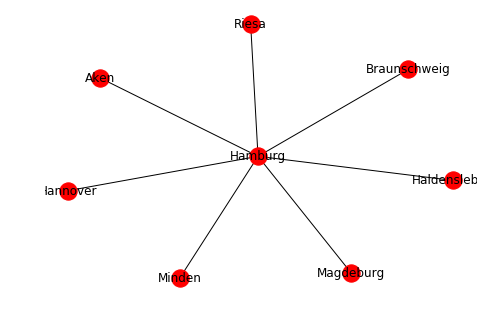

In [106]:
nx.draw(G_spectral_inland_comm_2, with_labels=True)

In [107]:
# IDE and INSIGHT: cari the most critical nodes by spectral bipartivity node. The node like Hamburg and above example
# will extremely prone to attack and lose the connection for the rest of cities for this type of modality.
# Check same node in other mode of transportation

In [108]:
# Spectral bipartivity for rail

In [109]:
# Make new dataframe for spectral bipartivity analysis
df_spectral_rail = df_rail.copy()
df_spectral_rail.reset_index(drop=True, inplace=True)

# Make a new list of sea community
l_spectral_rail_community = list(set(df_community_rail['Label-Rail'].values))

# Check which part of path not in the community of interest
spectral_not_in_rail_community = list()

for i in range(len(df_spectral_rail)):
    spectral_rail_origin = df_spectral_rail.loc[i,'O_City']
    spectral_rail_destination = df_spectral_rail.loc[i,'D_City']
        
    if spectral_rail_origin not in l_spectral_rail_community:
        spectral_not_in_rail_community.append(i)
    
    if spectral_rail_destination not in l_spectral_rail_community:
        spectral_not_in_rail_community.append(i)

# Drop the unused path and reset the index
df_spectral_rail.drop(index=spectral_not_in_rail_community, inplace=True)
df_spectral_rail.reset_index(drop=False, inplace=True)

# Make dictionary for mapping city and community ID
dict_spectral_rail = {df_community_rail.loc[i,'Label-Rail']:df_community_rail.loc[i,'Community-Rail'] for i in range(len(df_community_rail))}

for i in range(len(df_spectral_rail)):
    spectral_rail_origin = df_spectral_rail.loc[i,'O_City']
    spectral_rail_destination = df_spectral_rail.loc[i,'D_City']
    
    if spectral_rail_origin not in l_spectral_rail_community:
        df_spectral_rail.loc[i,'Community_ID'] = dict_spectral_rail[spectral_rail_destination]
    else:
        df_spectral_rail.loc[i,'Community_ID'] = dict_spectral_rail[spectral_rail_origin]

In [110]:
# check the value of sea community
set(df_spectral_rail['Community_ID'].values)

{0.0, 1.0, 2.0, 3.0, 4.0}

In [111]:
# Group the sea community by ID
df_spectral_rail_comm_0 = df_spectral_rail[df_spectral_rail['Community_ID'] == 0]
df_spectral_rail_comm_1 = df_spectral_rail[df_spectral_rail['Community_ID'] == 1]
df_spectral_rail_comm_2 = df_spectral_rail[df_spectral_rail['Community_ID'] == 2]
df_spectral_rail_comm_3 = df_spectral_rail[df_spectral_rail['Community_ID'] == 3]
df_spectral_rail_comm_4 = df_spectral_rail[df_spectral_rail['Community_ID'] == 4]

# Reset index for each sea community dataframe
df_spectral_rail_comm_0.reset_index(drop=True, inplace=True)
df_spectral_rail_comm_1.reset_index(drop=True, inplace=True)
df_spectral_rail_comm_2.reset_index(drop=True, inplace=True)
df_spectral_rail_comm_3.reset_index(drop=True, inplace=True)
df_spectral_rail_comm_4.reset_index(drop=True, inplace=True)

# Make the sea community graph before calculating spectral value
G_spectral_rail_comm_0 = nx.from_pandas_edgelist(df_spectral_rail_comm_0, source='O_City', target='D_City')
G_spectral_rail_comm_1 = nx.from_pandas_edgelist(df_spectral_rail_comm_1, source='O_City', target='D_City')
G_spectral_rail_comm_2 = nx.from_pandas_edgelist(df_spectral_rail_comm_2, source='O_City', target='D_City')
G_spectral_rail_comm_3 = nx.from_pandas_edgelist(df_spectral_rail_comm_3, source='O_City', target='D_City')
G_spectral_rail_comm_4 = nx.from_pandas_edgelist(df_spectral_rail_comm_4, source='O_City', target='D_City')

spectral_value_rail_comm_0 = nx.bipartite.spectral_bipartivity(G_spectral_rail_comm_0)
spectral_value_rail_comm_1 = nx.bipartite.spectral_bipartivity(G_spectral_rail_comm_1)
spectral_value_rail_comm_2 = nx.bipartite.spectral_bipartivity(G_spectral_rail_comm_2)
spectral_value_rail_comm_3 = nx.bipartite.spectral_bipartivity(G_spectral_rail_comm_3)
spectral_value_rail_comm_4 = nx.bipartite.spectral_bipartivity(G_spectral_rail_comm_4)

In [112]:
l_spectral_value_rail = [spectral_value_rail_comm_0,spectral_value_rail_comm_1,spectral_value_rail_comm_2,spectral_value_rail_comm_3,\
                        spectral_value_rail_comm_4]

In [113]:
spectral_value_rail_comm_1

0.6359838851497981

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


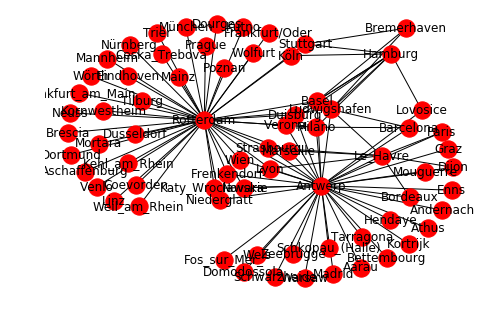

In [114]:
nx.draw_kamada_kawai(G_spectral_rail_comm_1, with_labels=True)

In [115]:
# IDE and TO DO: calculate the spectral bipartivity for 12 hubs in each mode and then list down in a table
# Make a table for the general spectral bipartivity. Columns: spectral bipartivity value for each mode. Index: Community ID
# Columns: spectral value for each mode for each hub. Put attention for the community ID in case the community was changed.
# Index: the hubs
# Intention to know the efficiency of the port - if this goes down or disrupted, how many redundant links available?
# Lower is better
# Find attractor or driver in each layer, which layer is the driver? 

In [116]:
# Put the spectral bipartivity results in the dataframe

In [117]:
df_spectral_total_value = pd.DataFrame(index=['Community-0','Community-1', 'Community-2','Community-3','Community-4','Community-5'], columns=['Inland','Sea','Rail'])

In [118]:
index_inland = len(l_spectral_value_inland)
df_spectral_total_value['Inland'][:index_inland] = l_spectral_value_inland

In [119]:
index_sea = len(l_spectral_value_sea)
df_spectral_total_value['Sea'][:index_sea] = l_spectral_value_sea

In [120]:
index_rail = len(l_spectral_value_rail)
df_spectral_total_value['Rail'][:index_rail] = l_spectral_value_rail

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [121]:
df_spectral_total_value_2 = np.float64(df_spectral_total_value)

In [122]:
df_spectral_total_value_3 = pd.DataFrame(df_spectral_total_value_2, index=['Community-0','Community-1', 'Community-2','Community-3','Community-4','Community-5'], columns=['Inland','Sea','Rail'])

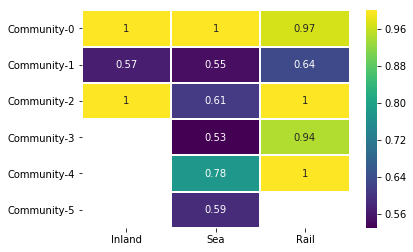

In [123]:
sns.heatmap(df_spectral_total_value_3, cmap='viridis', linewidths=1, annot=True)

In [124]:
hubs = ['Rotterdam',
 'Antwerp',
 'Hamburg',
 'Bremerhaven',
 'Valencia',
 'Piraeus',
 'Algeciras',
 'Felixstowe',
 'Barcelona',
 'Marsaxlokk',
 'Le_Havre',
 'Southampton']

In [125]:
# Make a multiindex for each levels
community_index = [0,1,2,0,1,2,3,4,5,0,1,2,3,4]
mode_index = ['Inland','Inland','Inland','Sea','Sea','Sea','Sea','Sea','Sea','Rail','Rail','Rail','Rail','Rail']
multi_index = list(zip(mode_index,community_index))
hub_index = pd.MultiIndex.from_tuples(multi_index)

In [126]:
#df_spectral_hub_value = pd.DataFrame(index=hub_index, columns=hubs)

In [127]:
# find spectral value for each hub and in each community

In [128]:
nx.bipartite.spectral_bipartivity(G_spectral_inland_comm_0, ['Rotterdam'])

{'Rotterdam': 1.0}

In [129]:
data = list()
for ports in hubs:
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_inland_comm_0, [ports])[ports])
    except:
        data.append(0)
    
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_inland_comm_1, [ports])[ports])
    except:
        data.append(0)
        
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_inland_comm_2, [ports])[ports])
    except:
        data.append(0)
        
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_0, [ports])[ports])
    except:
        data.append(0)
    
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_1, [ports])[ports])
    except:
        data.append(0)
        
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_2, [ports])[ports])
    except:
        data.append(0)
    
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_3, [ports])[ports])
    except:
        data.append(0)
        
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_4, [ports])[ports])
    except:
        data.append(0)
        
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_sea_comm_5, [ports])[ports])
    except:
        data.append(0)
        
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_rail_comm_0, [ports])[ports])
    except:
        data.append(0)
        
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_rail_comm_1, [ports])[ports])
    except:
        data.append(0)
        
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_rail_comm_2, [ports])[ports])
    except:
        data.append(0)
    
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_rail_comm_3, [ports])[ports])
    except:
        data.append(0)
        
    try:
        data.append(nx.bipartite.spectral_bipartivity(G_spectral_rail_comm_4, [ports])[ports])
    except:
        data.append(0)

In [130]:
new_data = list()
first_index = 0
last_index = 0

for i in range(len(hubs)):
    last_index = first_index + 14
    new_data.append(list(data[first_index:last_index]))
    first_index = last_index

In [131]:
dict_spectral_total = dict()
for i in range(len(hubs)):
    dict_spectral_total[hubs[i]] = new_data[i]

In [132]:
df_spectral_hub_value = pd.DataFrame(dict_spectral_total, index=hub_index)

In [133]:
df_spectral_hub_value

Rotterdam   Antwerp   Hamburg  Bremerhaven  Valencia   Piraeus  \
Inland 0   1.000000  1.000000  0.000000     0.000000  0.000000  0.000000   
       1   0.560724  0.553507  0.000000     0.000000  0.000000  0.000000   
       2   0.000000  0.000000  1.000000     0.000000  0.000000  0.000000   
Sea    0   1.000000  1.000000  1.000000     0.000000  1.000000  1.000000   
       1   0.556705  0.534007  0.515471     0.541808  0.534681  0.534321   
       2   0.519468  0.594148  0.606333     0.593350  0.659476  0.659476   
       3   0.531324  0.532283  0.550851     0.551568  0.519198  0.523940   
       4   0.876338  0.722913  0.980965     0.980965  0.776385  0.742993   
       5   0.593551  0.593551  0.625461     0.593551  0.566096  0.589279   
Rail   0   0.999885  0.861411  0.999894     0.999872  1.000000  0.000000   
       1   0.691300  0.549592  0.738360     0.785937  0.000000  0.000000   
       2   1.000000  1.000000  1.000000     1.000000  0.000000  0.000000   
       3   0.000000  0.796597  0.000000     0.000000  0.980871  0.000000   
       4   0.000000  0.000000  0.000000     0.000000  0.000000  0.000000   

          Algeciras  Felixstowe  Barcelona  Marsaxlokk  Le_Havre  Southampton  
Inland 0   0.000000    0.000000   0.000000    0.000000  1.000000     0.000000  
       1   0.000000    0.000000   0.000000    0.000000  0.000000     0.000000  
       2   0.000000    0.000000   0.000000    0.000000  0.000000     0.000000  
Sea    0   1.000000    1.000000   1.000000    0.000000  1.000000     1.000000  
       1   0.514235    0.514418   0.000000    0.582085  0.518245     0.521559  
       2   0.659476    0.659476   0.000000    0.659476  0.702033     0.000000  
       3   0.526020    0.551568   0.518132    0.529398  0.532283     0.547734  
       4   0.915384    0.912433   0.000000    0.980965  0.722913     0.642237  
       5   0.569168    0.593551   0.588036    0.557319  0.000000     0.732422  
Rail   0   0.000000    1.000000   1.000000    0.000000  0.939879     0.000000  
       1   0.000000    0.000000   0.544733    0.000000  0.541660     0.000000  
       2   0.000000    0.000000   0.000000    0.000000  0.000000     0.000000  
       3   0.000000    0.000000   0.928622    0.000000  0.000000     0.000000  
       4   0.000000    1.000000   0.000000    0.000000  0.000000     1.000000

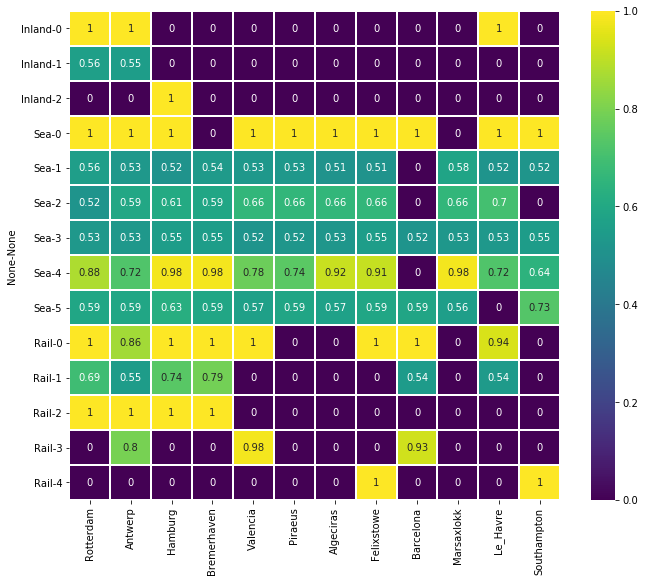

In [134]:
f,ax = plt.subplots(figsize=(11,9), nrows=1, ncols=1)
sns.heatmap(df_spectral_hub_value, cmap='viridis', linewidths=1, annot=True, ax=ax)

In [135]:
# Why same ports could be in 2 communities? - because of the destination is the port in other community\
# no ports can have a standalone. It must be connected somewhere

In [136]:
# TO DO - suggestion for next research
# Spectral bipartivity for aggregate network - aggregate maksudnya combine seluruh modality di satu layer
# Column is hubs. Index is community index. Present heatmap the value of spectral bipartivity of the hubs.
# Pikir dl dan kalau keburu bikin

In [137]:
# TO DO - buat next research
# Pake dan check community structure aggregate network di R dan jalanin step by step kyk tadi
# Community ada 23 lebih di aggregate network dan petain kyk langkah-langkah diatas.

In [138]:
# TO DO - For next research
# community detection by weighted links.

In [139]:
df_spectral = df_all.copy()
df_spectral.replace(to_replace = r" ", value = "_", regex=True, inplace=True)
df_spectral.reset_index(drop=True, inplace=True)

In [140]:
# Separate by community ID


In [141]:
# Batasan

In [142]:
# random walker didn't really cover all sample points.
# Hence, some nodes are missing in the community.

In [143]:
# 4 Combination of visualization for the interchange based on hierarchical subgraphs (inland and sea should come together)

In [144]:
# Inland-Sea-Rail - Priority analysis after clustering
# Sea-Inland-Rail
# Rail-Sea_inland
# Rail-Inland-Sea

In [145]:
# Batasan

In [146]:
df_spectral_sea_networkx_0 = df_spectral_sea_comm_0.copy()
df_spectral_sea_networkx_1 = df_spectral_sea_comm_1.copy()
df_spectral_sea_networkx_2 = df_spectral_sea_comm_2.copy()
df_spectral_sea_networkx_3 = df_spectral_sea_comm_3.copy()
df_spectral_sea_networkx_4 = df_spectral_sea_comm_4.copy()
df_spectral_sea_networkx_5 = df_spectral_sea_comm_5.copy()

In [147]:
df_spectral_inland_networkx_0 = df_spectral_inland_comm_0.copy()
df_spectral_inland_networkx_1 = df_spectral_inland_comm_1.copy()
df_spectral_inland_networkx_2 = df_spectral_inland_comm_2.copy()

In [148]:
df_spectral_rail_networkx_0 = df_spectral_rail_comm_0.copy()
df_spectral_rail_networkx_1 = df_spectral_rail_comm_1.copy()
df_spectral_rail_networkx_2 = df_spectral_rail_comm_2.copy()
df_spectral_rail_networkx_3 = df_spectral_rail_comm_3.copy()
df_spectral_rail_networkx_4 = df_spectral_rail_comm_4.copy()

In [149]:
# Eliminate NaN so it can be plotted on the map

In [150]:
df_spectral_sea_networkx_0.dropna(inplace=True)
df_spectral_sea_networkx_1.dropna(inplace=True)
df_spectral_sea_networkx_2.dropna(inplace=True)
df_spectral_sea_networkx_3.dropna(inplace=True)
df_spectral_sea_networkx_4.dropna(inplace=True)
df_spectral_sea_networkx_5.dropna(inplace=True)

df_spectral_sea_networkx_0.reset_index(drop=True, inplace=True)
df_spectral_sea_networkx_1.reset_index(drop=True, inplace=True)
df_spectral_sea_networkx_2.reset_index(drop=True, inplace=True)
df_spectral_sea_networkx_3.reset_index(drop=True, inplace=True)
df_spectral_sea_networkx_4.reset_index(drop=True, inplace=True)
df_spectral_sea_networkx_5.reset_index(drop=True, inplace=True)

In [151]:
df_spectral_inland_networkx_0.dropna(inplace=True)
df_spectral_inland_networkx_1.dropna(inplace=True)
df_spectral_inland_networkx_2.dropna(inplace=True)

df_spectral_inland_networkx_0.reset_index(drop=True, inplace=True)
df_spectral_inland_networkx_1.reset_index(drop=True, inplace=True)
df_spectral_inland_networkx_2.reset_index(drop=True, inplace=True)

In [152]:
df_spectral_rail_networkx_0.dropna(inplace=True)
df_spectral_rail_networkx_1.dropna(inplace=True)
df_spectral_rail_networkx_2.dropna(inplace=True)
df_spectral_rail_networkx_3.dropna(inplace=True)
df_spectral_rail_networkx_4.dropna(inplace=True)

df_spectral_rail_networkx_0.reset_index(drop=True, inplace=True)
df_spectral_rail_networkx_1.reset_index(drop=True, inplace=True)
df_spectral_rail_networkx_2.reset_index(drop=True, inplace=True)
df_spectral_rail_networkx_3.reset_index(drop=True, inplace=True)
df_spectral_rail_networkx_4.reset_index(drop=True, inplace=True)

In [153]:
# Create graph
graph_sea_0 = nx.from_pandas_edgelist(df_spectral_sea_networkx_0, source='O_City', target='D_City',
                        create_using = nx.DiGraph())
graph_sea_1 = nx.from_pandas_edgelist(df_spectral_sea_networkx_1, source='O_City', target='D_City',
                        create_using = nx.DiGraph())
graph_sea_2 = nx.from_pandas_edgelist(df_spectral_sea_networkx_2, source='O_City', target='D_City',
                        create_using = nx.DiGraph())
graph_sea_3 = nx.from_pandas_edgelist(df_spectral_sea_networkx_3, source='O_City', target='D_City',
                        create_using = nx.DiGraph())
graph_sea_4 = nx.from_pandas_edgelist(df_spectral_sea_networkx_4, source='O_City', target='D_City',
                        create_using = nx.DiGraph())
graph_sea_5 = nx.from_pandas_edgelist(df_spectral_sea_networkx_5, source='O_City', target='D_City',
                        create_using = nx.DiGraph())

In [154]:
# Create graph
graph_inland_0 = nx.from_pandas_edgelist(df_spectral_inland_networkx_0, source='O_City', target='D_City',
                        create_using = nx.DiGraph())
graph_inland_1 = nx.from_pandas_edgelist(df_spectral_inland_networkx_1, source='O_City', target='D_City',
                        create_using = nx.DiGraph())
graph_inland_2 = nx.from_pandas_edgelist(df_spectral_inland_networkx_2, source='O_City', target='D_City',
                        create_using = nx.DiGraph())

In [155]:
# Create graph
graph_rail_0 = nx.from_pandas_edgelist(df_spectral_rail_networkx_0, source='O_City', target='D_City',
                        create_using = nx.DiGraph())
graph_rail_1 = nx.from_pandas_edgelist(df_spectral_rail_networkx_1, source='O_City', target='D_City',
                        create_using = nx.DiGraph())
graph_rail_2 = nx.from_pandas_edgelist(df_spectral_rail_networkx_2, source='O_City', target='D_City',
                        create_using = nx.DiGraph())
graph_rail_3 = nx.from_pandas_edgelist(df_spectral_rail_networkx_3, source='O_City', target='D_City',
                        create_using = nx.DiGraph())
graph_rail_4 = nx.from_pandas_edgelist(df_spectral_rail_networkx_4, source='O_City', target='D_City',
                        create_using = nx.DiGraph())

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/andreas.yunus/anaconda/envs/py36/lib/p

community 0 done
community 1 done
community 2 done
community 3 done
community 4 done
community 5 done


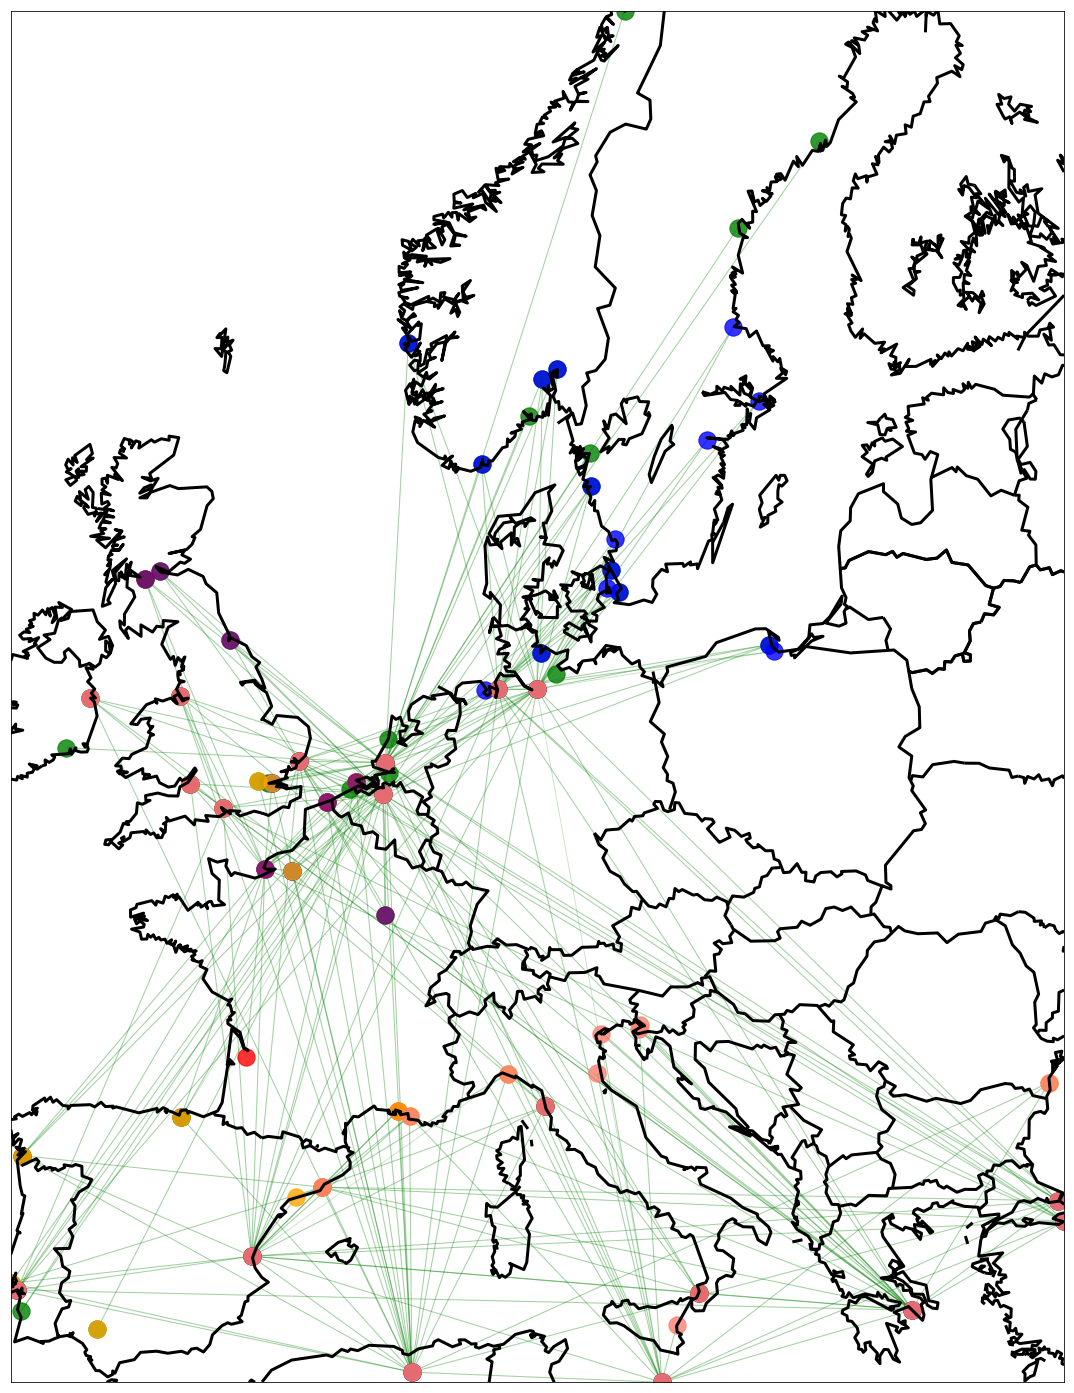

successful visualization


In [156]:
# Set up base map
plt.figure(figsize=(15,20))
m_sea = Basemap(
        projection='merc',
        llcrnrlon=-9.1365919,
        llcrnrlat=35.841,
        urcrnrlon=29.1799867634759,
        urcrnrlat=65.8376537,
        lat_ts=0,
        resolution='l',
        suppress_ticks=True)

mx_sea, my_sea = m_sea(df_loc_community_sea['nodeLong'].values, df_loc_community_sea['nodeLat'].values)

pos = {}

for count, elem in enumerate (df_loc_community_sea['Label-Sea']):
    pos[elem] = (mx_sea[count], my_sea[count])

# Map the Rail Connections
# draw nodes and edges and overly on basemap
# draw nodes and edges and over aly on basemap
nx.draw_networkx_nodes(G = graph_sea_0, pos = pos, node_list = graph_sea_0.nodes(), node_color = 'red', alpha = 0.8)
nx.draw_networkx_edges(G = graph_sea_0, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 0 done')

nx.draw_networkx_nodes(G = graph_sea_1, pos = pos, node_list = graph_sea_1.nodes(), node_color = 'green', alpha = 0.8)
nx.draw_networkx_edges(G = graph_sea_1, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 1 done')

nx.draw_networkx_nodes(G = graph_sea_2, pos = pos, node_list = graph_sea_2.nodes(), node_color = 'blue', alpha = 0.8)
nx.draw_networkx_edges(G = graph_sea_2, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 2 done')

nx.draw_networkx_nodes(G = graph_sea_3, pos = pos, node_list = graph_sea_3.nodes(), node_color = 'orange', alpha = 0.8)
nx.draw_networkx_edges(G = graph_sea_3, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 3 done')

nx.draw_networkx_nodes(G = graph_sea_4, pos = pos, node_list = graph_sea_4.nodes(), node_color = 'purple', alpha = 0.8)
nx.draw_networkx_edges(G = graph_sea_4, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 4 done')

nx.draw_networkx_nodes(G = graph_sea_5, pos = pos, node_list = graph_sea_5.nodes(), node_color = 'salmon', alpha = 0.8)
nx.draw_networkx_edges(G = graph_sea_5, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 5 done')

m_sea.drawcountries(linewidth = 3)
m_sea.drawstates(linewidth = 0.2)
m_sea.drawcoastlines(linewidth=3)
plt.tight_layout()
plt.savefig("map_sea_2018.png", format = "png", dpi = 300)
plt.show()
print ("successful visualization")

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


community 0 done
community 1 done
community 2 done


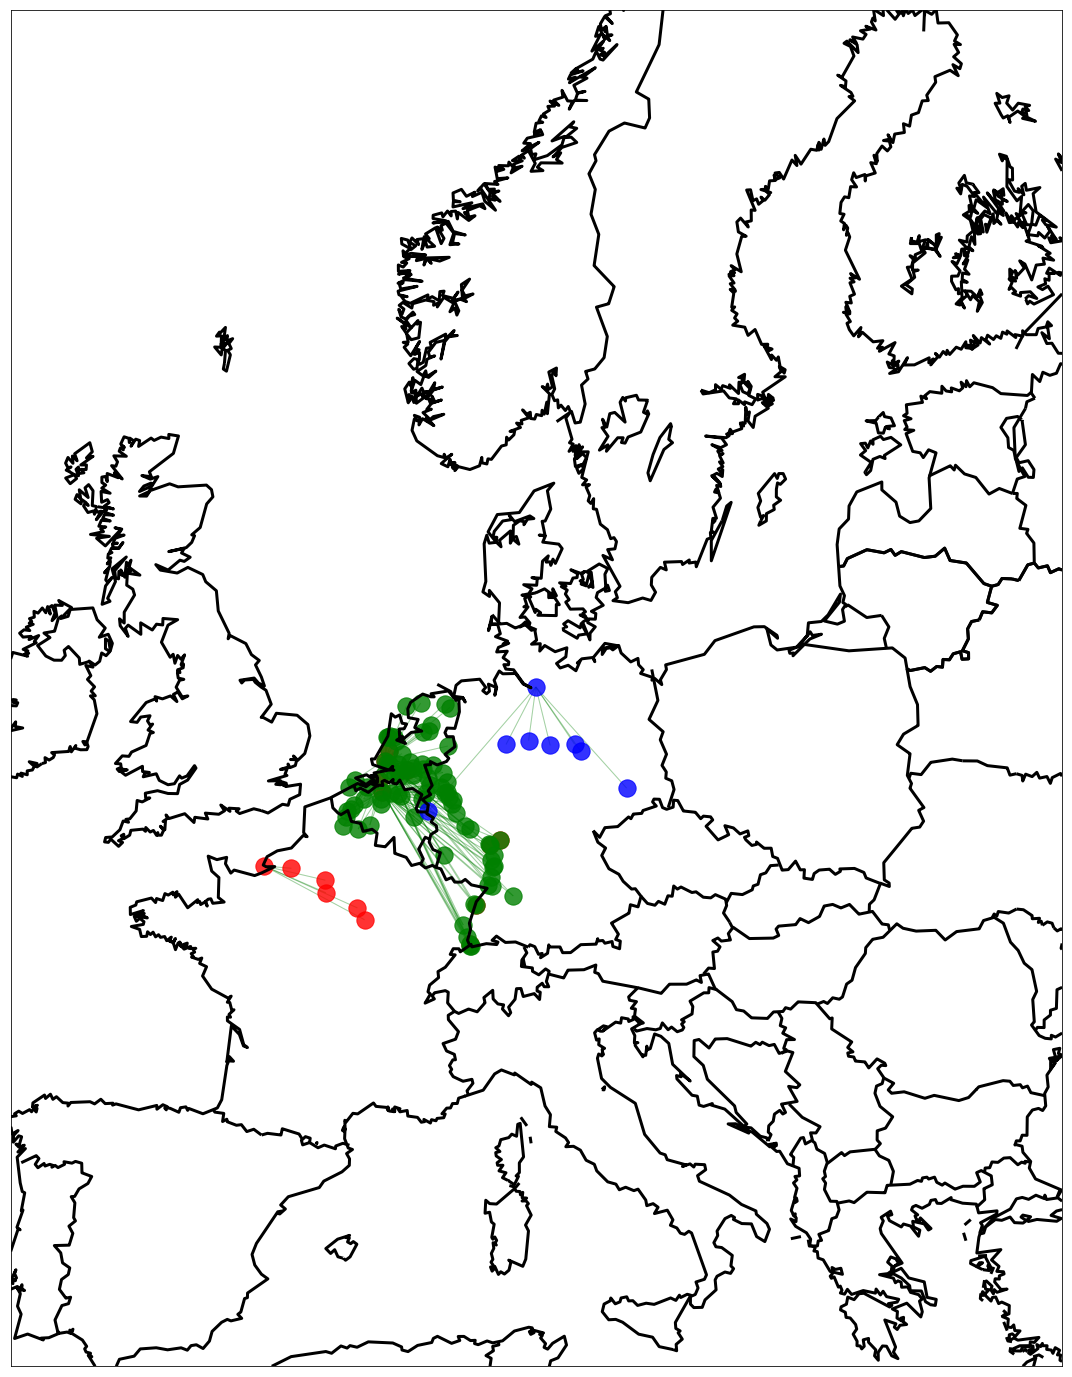

successful visualization


In [157]:
# Set up base map
plt.figure(figsize=(15,20))
m_inland = Basemap(
        projection='merc',
        llcrnrlon=-9.1365919,
        llcrnrlat=36.2097633,
        urcrnrlon=29.1799867634759,
        urcrnrlat=65.8376537,
        lat_ts=0,
        resolution='l',
        suppress_ticks=True)

mx_inland, my_inland = m_inland(df_loc_community_inland['nodeLong'].values, df_loc_community_inland['nodeLat'].values)

pos = {}

for count, elem in enumerate (df_loc_community_inland['Label-Inland']):
    pos[elem] = (mx_inland[count], my_inland[count])
    
# Map the Rail Connections
# draw nodes and edges and overly on basemap
# draw nodes and edges and over aly on basemap
nx.draw_networkx_nodes(G = graph_inland_0, pos = pos, node_list = graph_inland_0.nodes(), node_color = 'red', alpha = 0.8)
nx.draw_networkx_edges(G = graph_inland_0, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 0 done')

nx.draw_networkx_nodes(G = graph_inland_1, pos = pos, node_list = graph_inland_1.nodes(), node_color = 'green', alpha = 0.8)
nx.draw_networkx_edges(G = graph_inland_1, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 1 done')

nx.draw_networkx_nodes(G = graph_inland_2, pos = pos, node_list = graph_inland_2.nodes(), node_color = 'blue', alpha = 0.8)
nx.draw_networkx_edges(G = graph_inland_2, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 2 done')

m_inland.drawcountries(linewidth = 3)
m_inland.drawstates(linewidth = 0.2)
m_inland.drawcoastlines(linewidth=3)
plt.tight_layout()
plt.savefig("map_inland_2018.png", format = "png", dpi = 300)
plt.show()
print ("successful visualization")

/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
/Users/andreas.yunus/anaconda/envs/py36/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


community 0 done
community 1 done
community 2 done
community 3 done
community 4 done


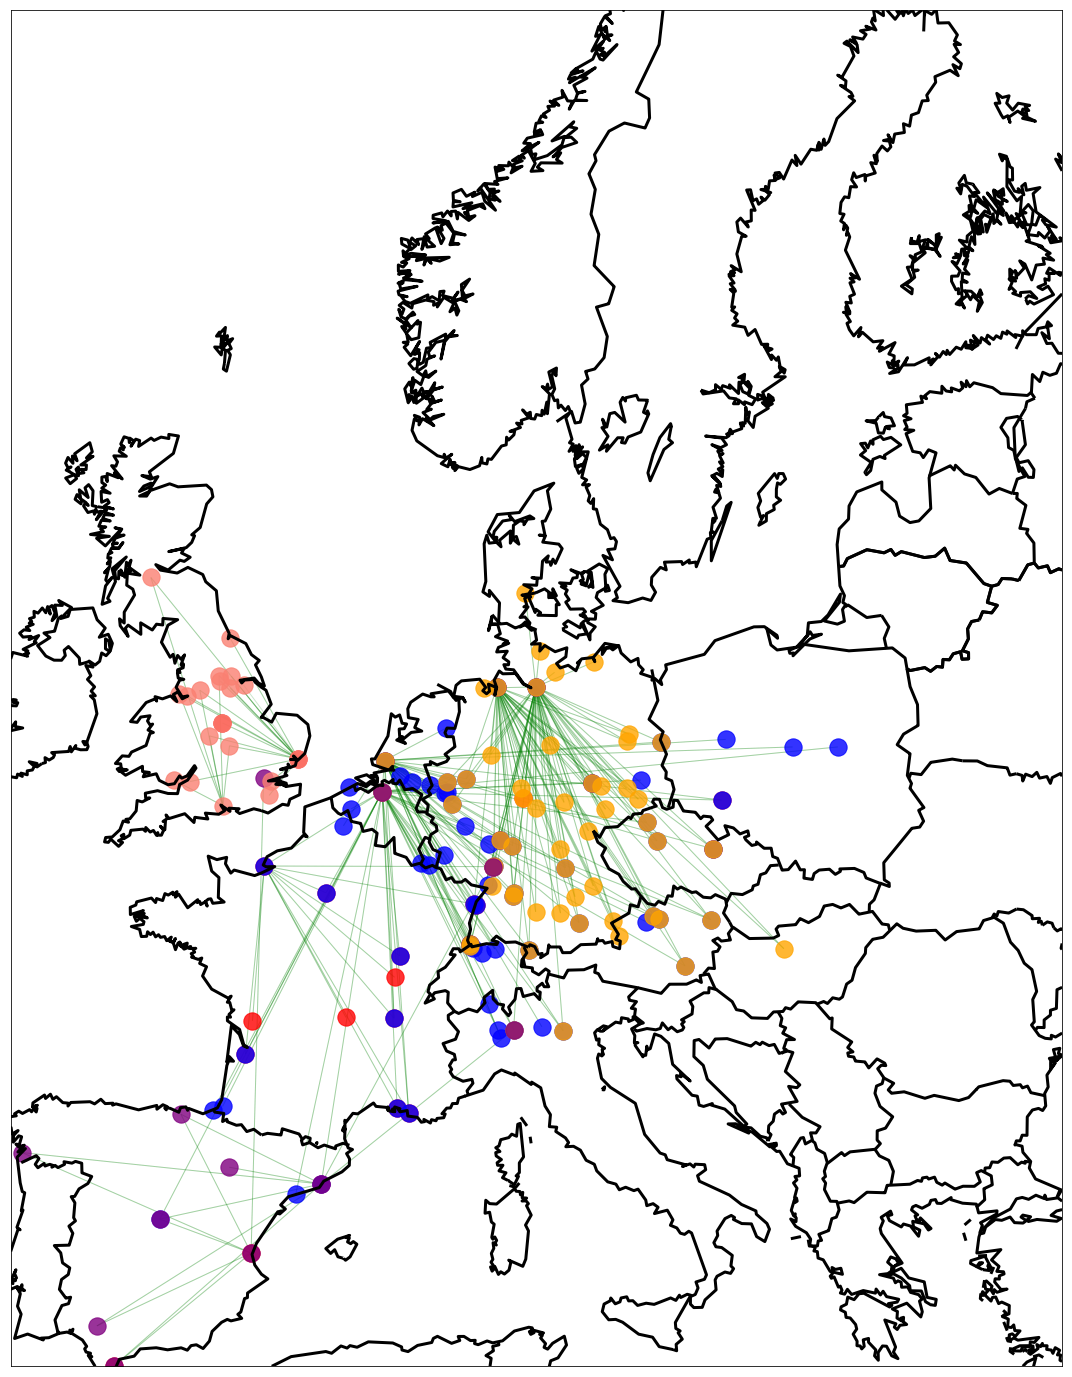

successful visualization


In [158]:
# Set up base map
plt.figure(figsize=(15,20))
m = Basemap(
        projection='merc',
        llcrnrlon=-9.1365919,
        llcrnrlat=36.2097633,
        urcrnrlon=29.1799867634759,
        urcrnrlat=65.8376537,
        lat_ts=0,
        resolution='l',
        suppress_ticks=True)

mx, my = m(df_loc_community_rail['nodeLong'].values, df_loc_community_rail['nodeLat'].values)

pos = {}

for count, elem in enumerate (df_loc_community_rail['Label-Rail']):
    pos[elem] = (mx[count], my[count])
    
# Map the Rail Connections
# draw nodes and edges and overly on basemap
# draw nodes and edges and over aly on basemap
nx.draw_networkx_nodes(G = graph_rail_0, pos = pos, node_list = graph_rail_0.nodes(), node_color = 'red', alpha = 0.8)
nx.draw_networkx_edges(G = graph_rail_0, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 0 done')

nx.draw_networkx_nodes(G = graph_rail_1, pos = pos, node_list = graph_rail_1.nodes(), node_color = 'blue', alpha = 0.8)
nx.draw_networkx_edges(G = graph_rail_1, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 1 done')

nx.draw_networkx_nodes(G = graph_rail_2, pos = pos, node_list = graph_rail_2.nodes(), node_color = 'orange', alpha = 0.8)
nx.draw_networkx_edges(G = graph_rail_2, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 2 done')

nx.draw_networkx_nodes(G = graph_rail_3, pos = pos, node_list = graph_rail_3.nodes(), node_color = 'purple', alpha = 0.8)
nx.draw_networkx_edges(G = graph_rail_3, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 3 done')

nx.draw_networkx_nodes(G = graph_rail_4, pos = pos, node_list = graph_rail_4.nodes(), node_color = 'salmon', alpha = 0.8)
nx.draw_networkx_edges(G = graph_rail_4, pos = pos, edge_color='g', 
                       alpha=0.2, arrows = False)

print('community 4 done')

m.drawcountries(linewidth = 3)
m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=3)
plt.tight_layout()
plt.savefig("map_rail_2018.png", format = "png", dpi = 300)
plt.show()
print ("successful visualization")

In [159]:
# batasan

In [160]:
# Check perbedaan df spectral ama df_loc_community_rail - asal muasal dropna

# Matthew Effect

In [161]:
# Sea

In [162]:
df_centrality_sea = pd.read_csv("Centrality_Directed_Weighted_2018_09062019.csv", sep=';')
df_centrality_sea.rename({'Label':'Label-Sea'}, axis=1, inplace=True)
df_matthew_sea = pd.merge(df_community_sea, df_centrality_sea, on='Label-Sea')
df_matthew_sea = df_matthew_sea[df_matthew_sea['Layer_y']=='1-Multi']
df_matthew_sea.reset_index(drop=True, inplace=True)
df_matthew_sea_community_0 = df_matthew_sea[df_matthew_sea['Community-Sea']==0]
df_matthew_sea_community_1 = df_matthew_sea[df_matthew_sea['Community-Sea']==1]
df_matthew_sea_community_2 = df_matthew_sea[df_matthew_sea['Community-Sea']==2]
df_matthew_sea_community_3 = df_matthew_sea[df_matthew_sea['Community-Sea']==3]
df_matthew_sea_community_4 = df_matthew_sea[df_matthew_sea['Community-Sea']==4]
df_matthew_sea_community_5 = df_matthew_sea[df_matthew_sea['Community-Sea']==5]

In [163]:
df_matthew_sea_community_0.mean()

Node_x           76.000000
Community-Sea     0.000000
Node_y           76.000000
Strength         62.500000
StrengthIn       31.250000
StrengthOut      31.250000
Degree           12.500000
DegreeIn          6.250000
DegreeOut         6.250000
PageRank          0.041390
Eigenvector       0.000037
Multiplexity      0.083333
Kcore             2.500000
dtype: float64

In [164]:
df_matthew_sea_community_1.mean()

Node_x           151.375000
Community-Sea      1.000000
Node_y           151.375000
Strength         491.583333
StrengthIn       245.958333
StrengthOut      245.625000
Degree            40.583333
DegreeIn          20.291667
DegreeOut         20.291667
PageRank           0.091837
Eigenvector        0.090366
Multiplexity       0.500000
Kcore              7.916667
dtype: float64

In [165]:
df_matthew_sea_community_2.mean()

Node_x           103.937500
Community-Sea      2.000000
Node_y           103.937500
Strength         462.562500
StrengthIn       231.187500
StrengthOut      231.375000
Degree            34.250000
DegreeIn          17.125000
DegreeOut         17.125000
PageRank           0.080039
Eigenvector        0.010553
Multiplexity       0.437500
Kcore              8.187500
dtype: float64

In [166]:
df_matthew_sea_community_3.mean()

Node_x           127.615385
Community-Sea      3.000000
Node_y           127.615385
Strength         133.692308
StrengthIn        66.692308
StrengthOut       67.000000
Degree            30.153846
DegreeIn          15.076923
DegreeOut         15.076923
PageRank           0.038396
Eigenvector        0.000953
Multiplexity       0.512821
Kcore             11.461538
dtype: float64

In [167]:
df_matthew_sea_community_4.mean()

Node_x           102.200000
Community-Sea      4.000000
Node_y           102.200000
Strength         242.600000
StrengthIn       123.800000
StrengthOut      118.800000
Degree            36.600000
DegreeIn          18.400000
DegreeOut         18.200000
PageRank           0.063659
Eigenvector        0.002209
Multiplexity       0.600000
Kcore             12.400000
dtype: float64

In [168]:
df_matthew_sea.columns.values

array(['Layer_x', 'Node_x', 'Label-Sea', 'Community-Sea', 'Layer_y',
       'Node_y', 'Strength', 'StrengthIn', 'StrengthOut', 'Degree',
       'DegreeIn', 'DegreeOut', 'PageRank', 'Eigenvector', 'Hub',
       'Authority', 'Katz', 'Multiplexity', 'Kcore'], dtype=object)

In [169]:
df_csv_matthew_sea = pd.DataFrame(columns=['Strength', 'StrengthIn', 'StrengthOut', 'Degree',
       'DegreeIn', 'DegreeOut', 'PageRank', 'Eigenvector', 'Multiplexity', 'Kcore'], index=['Sea_community_0','Sea_community_1',
                                                                            'Sea_community_2','Sea_community_3','Sea_community_4','Sea_community_5'])

In [170]:
for i in range(len(df_csv_matthew_sea)):
    df_csv_matthew_sea.loc['Sea_community_0','Strength'] = df_matthew_sea_community_0.mean()['Strength']
    df_csv_matthew_sea.loc['Sea_community_1','Strength'] = df_matthew_sea_community_1.mean()['Strength']
    df_csv_matthew_sea.loc['Sea_community_2','Strength'] = df_matthew_sea_community_2.mean()['Strength']
    df_csv_matthew_sea.loc['Sea_community_3','Strength'] = df_matthew_sea_community_3.mean()['Strength']
    df_csv_matthew_sea.loc['Sea_community_4','Strength'] = df_matthew_sea_community_4.mean()['Strength']
    df_csv_matthew_sea.loc['Sea_community_5','Strength'] = df_matthew_sea_community_5.mean()['Strength']
     
    df_csv_matthew_sea.loc['Sea_community_0','StrengthIn'] = df_matthew_sea_community_0.mean()['StrengthIn']
    df_csv_matthew_sea.loc['Sea_community_1','StrengthIn'] = df_matthew_sea_community_1.mean()['StrengthIn']
    df_csv_matthew_sea.loc['Sea_community_2','StrengthIn'] = df_matthew_sea_community_2.mean()['StrengthIn']
    df_csv_matthew_sea.loc['Sea_community_3','StrengthIn'] = df_matthew_sea_community_3.mean()['StrengthIn']
    df_csv_matthew_sea.loc['Sea_community_4','StrengthIn'] = df_matthew_sea_community_4.mean()['StrengthIn']
    df_csv_matthew_sea.loc['Sea_community_5','StrengthIn'] = df_matthew_sea_community_5.mean()['StrengthIn']
    
    df_csv_matthew_sea.loc['Sea_community_0','StrengthOut'] = df_matthew_sea_community_0.mean()['StrengthOut']
    df_csv_matthew_sea.loc['Sea_community_1','StrengthOut'] = df_matthew_sea_community_1.mean()['StrengthOut']
    df_csv_matthew_sea.loc['Sea_community_2','StrengthOut'] = df_matthew_sea_community_2.mean()['StrengthOut']
    df_csv_matthew_sea.loc['Sea_community_3','StrengthOut'] = df_matthew_sea_community_3.mean()['StrengthOut']
    df_csv_matthew_sea.loc['Sea_community_4','StrengthOut'] = df_matthew_sea_community_4.mean()['StrengthOut']
    df_csv_matthew_sea.loc['Sea_community_5','StrengthOut'] = df_matthew_sea_community_5.mean()['StrengthOut']
    
    df_csv_matthew_sea.loc['Sea_community_0','Degree'] = df_matthew_sea_community_0.mean()['Degree']
    df_csv_matthew_sea.loc['Sea_community_1','Degree'] = df_matthew_sea_community_1.mean()['Degree']
    df_csv_matthew_sea.loc['Sea_community_2','Degree'] = df_matthew_sea_community_2.mean()['Degree']
    df_csv_matthew_sea.loc['Sea_community_3','Degree'] = df_matthew_sea_community_3.mean()['Degree']
    df_csv_matthew_sea.loc['Sea_community_4','Degree'] = df_matthew_sea_community_4.mean()['Degree']
    df_csv_matthew_sea.loc['Sea_community_5','Degree'] = df_matthew_sea_community_5.mean()['Degree']
    
    df_csv_matthew_sea.loc['Sea_community_0','DegreeIn'] = df_matthew_sea_community_0.mean()['DegreeIn']
    df_csv_matthew_sea.loc['Sea_community_1','DegreeIn'] = df_matthew_sea_community_1.mean()['DegreeIn']
    df_csv_matthew_sea.loc['Sea_community_2','DegreeIn'] = df_matthew_sea_community_2.mean()['DegreeIn']
    df_csv_matthew_sea.loc['Sea_community_3','DegreeIn'] = df_matthew_sea_community_3.mean()['DegreeIn']
    df_csv_matthew_sea.loc['Sea_community_4','DegreeIn'] = df_matthew_sea_community_4.mean()['DegreeIn']
    df_csv_matthew_sea.loc['Sea_community_5','DegreeIn'] = df_matthew_sea_community_5.mean()['DegreeIn']
    
    df_csv_matthew_sea.loc['Sea_community_0','DegreeOut'] = df_matthew_sea_community_0.mean()['DegreeOut']
    df_csv_matthew_sea.loc['Sea_community_1','DegreeOut'] = df_matthew_sea_community_1.mean()['DegreeOut']
    df_csv_matthew_sea.loc['Sea_community_2','DegreeOut'] = df_matthew_sea_community_2.mean()['DegreeOut']
    df_csv_matthew_sea.loc['Sea_community_3','DegreeOut'] = df_matthew_sea_community_3.mean()['DegreeOut']
    df_csv_matthew_sea.loc['Sea_community_4','DegreeOut'] = df_matthew_sea_community_4.mean()['DegreeOut']
    df_csv_matthew_sea.loc['Sea_community_5','DegreeOut'] = df_matthew_sea_community_5.mean()['DegreeOut']
    
    df_csv_matthew_sea.loc['Sea_community_0','PageRank'] = df_matthew_sea_community_0.mean()['PageRank']
    df_csv_matthew_sea.loc['Sea_community_1','PageRank'] = df_matthew_sea_community_1.mean()['PageRank']
    df_csv_matthew_sea.loc['Sea_community_2','PageRank'] = df_matthew_sea_community_2.mean()['PageRank']
    df_csv_matthew_sea.loc['Sea_community_3','PageRank'] = df_matthew_sea_community_3.mean()['PageRank']
    df_csv_matthew_sea.loc['Sea_community_4','PageRank'] = df_matthew_sea_community_4.mean()['PageRank']
    df_csv_matthew_sea.loc['Sea_community_5','PageRank'] = df_matthew_sea_community_5.mean()['PageRank']
    
    df_csv_matthew_sea.loc['Sea_community_0','Eigenvector'] = df_matthew_sea_community_0.mean()['Eigenvector']
    df_csv_matthew_sea.loc['Sea_community_1','Eigenvector'] = df_matthew_sea_community_1.mean()['Eigenvector']
    df_csv_matthew_sea.loc['Sea_community_2','Eigenvector'] = df_matthew_sea_community_2.mean()['Eigenvector']
    df_csv_matthew_sea.loc['Sea_community_3','Eigenvector'] = df_matthew_sea_community_3.mean()['Eigenvector']
    df_csv_matthew_sea.loc['Sea_community_4','Eigenvector'] = df_matthew_sea_community_4.mean()['Eigenvector']
    df_csv_matthew_sea.loc['Sea_community_5','Eigenvector'] = df_matthew_sea_community_5.mean()['Eigenvector']
    
    df_csv_matthew_sea.loc['Sea_community_0','Multiplexity'] = df_matthew_sea_community_0.mean()['Multiplexity']
    df_csv_matthew_sea.loc['Sea_community_1','Multiplexity'] = df_matthew_sea_community_1.mean()['Multiplexity']
    df_csv_matthew_sea.loc['Sea_community_2','Multiplexity'] = df_matthew_sea_community_2.mean()['Multiplexity']
    df_csv_matthew_sea.loc['Sea_community_3','Multiplexity'] = df_matthew_sea_community_3.mean()['Multiplexity']
    df_csv_matthew_sea.loc['Sea_community_4','Multiplexity'] = df_matthew_sea_community_4.mean()['Multiplexity']
    df_csv_matthew_sea.loc['Sea_community_5','Multiplexity'] = df_matthew_sea_community_5.mean()['Multiplexity']
    
    df_csv_matthew_sea.loc['Sea_community_0','Kcore'] = df_matthew_sea_community_0.mean()['Kcore']
    df_csv_matthew_sea.loc['Sea_community_1','Kcore'] = df_matthew_sea_community_1.mean()['Kcore']
    df_csv_matthew_sea.loc['Sea_community_2','Kcore'] = df_matthew_sea_community_2.mean()['Kcore']
    df_csv_matthew_sea.loc['Sea_community_3','Kcore'] = df_matthew_sea_community_3.mean()['Kcore']
    df_csv_matthew_sea.loc['Sea_community_4','Kcore'] = df_matthew_sea_community_4.mean()['Kcore']
    df_csv_matthew_sea.loc['Sea_community_5','Kcore'] = df_matthew_sea_community_5.mean()['Kcore']

In [171]:
df_csv_matthew_sea

,Strength,StrengthIn,StrengthOut,Degree,DegreeIn,DegreeOut,PageRank,Eigenvector,Multiplexity,Kcore
Sea_community_0,62.5,31.25,31.25,12.5,6.25,6.25,0.0413895,3.68483e-05,0.0833333,2.5
Sea_community_1,491.583,245.958,245.625,40.5833,20.2917,20.2917,0.091837,0.0903658,0.5,7.91667
Sea_community_2,462.562,231.188,231.375,34.25,17.125,17.125,0.080039,0.0105531,0.4375,8.1875
Sea_community_3,133.692,66.6923,67,30.1538,15.0769,15.0769,0.0383963,0.000953355,0.512821,11.4615
Sea_community_4,242.6,123.8,118.8,36.6,18.4,18.2,0.0636586,0.00220885,0.6,12.4
Sea_community_5,108.8,55.3,53.5,25,12.5,12.5,0.0398293,0.000901697,0.333333,9.9


In [172]:
df_csv_matthew_sea.to_csv("matthew_sea_2018.csv")

In [173]:
# Inland

In [174]:
df_centrality_inland = pd.read_csv("Centrality_Directed_Weighted_2018_09062019.csv", sep=';')
df_centrality_inland.rename({'Label':'Label-Inland'}, axis=1, inplace=True)
df_matthew_inland = pd.merge(df_community_inland, df_centrality_inland, on='Label-Inland')
df_matthew_inland = df_matthew_inland[df_matthew_inland['Layer_y']=='1-Multi']
df_matthew_inland.reset_index(drop=True, inplace=True)
df_matthew_inland_community_0 = df_matthew_inland[df_matthew_inland['Community-Inland']==0]
df_matthew_inland_community_1 = df_matthew_inland[df_matthew_inland['Community-Inland']==1]
df_matthew_inland_community_2 = df_matthew_inland[df_matthew_inland['Community-Inland']==2]

In [175]:
df_matthew_inland_community_0.mean()

Node_x              102.230769
Community-Inland      0.000000
Node_y              102.230769
Strength             62.153846
StrengthIn           31.076923
StrengthOut          31.076923
Degree               12.769231
DegreeIn              6.384615
DegreeOut             6.384615
PageRank              0.042351
Eigenvector           0.000067
Multiplexity          0.051282
Kcore                 2.769231
dtype: float64

In [176]:
df_matthew_inland_community_1.mean()

Node_x              134.592105
Community-Inland      1.000000
Node_y              134.592105
Strength            263.802632
StrengthIn          131.815789
StrengthOut         131.986842
Degree               23.723684
DegreeIn             11.855263
DegreeOut            11.868421
PageRank              0.051207
Eigenvector           0.096142
Multiplexity          0.451754
Kcore                 5.934211
dtype: float64

In [177]:
df_matthew_inland_community_2.mean()

Node_x               99.375000
Community-Inland      2.000000
Node_y               99.375000
Strength            564.875000
StrengthIn          282.375000
StrengthOut         282.500000
Degree               35.000000
DegreeIn             17.375000
DegreeOut            17.625000
PageRank              0.100311
Eigenvector           0.008969
Multiplexity          0.500000
Kcore                 6.250000
dtype: float64

In [178]:
df_csv_matthew_inland = pd.DataFrame(columns=['Strength', 'StrengthIn', 'StrengthOut', 'Degree',
       'DegreeIn', 'DegreeOut', 'PageRank', 'Eigenvector', 'Multiplexity', 'Kcore'], index=['Inland_community_0','Inland_community_1',
                                                                            'Inland_community_2'])

In [179]:
for i in range(len(df_csv_matthew_inland)):
    df_csv_matthew_inland.loc['Inland_community_0','Strength'] = df_matthew_inland_community_0.mean()['Strength']
    df_csv_matthew_inland.loc['Inland_community_1','Strength'] = df_matthew_inland_community_1.mean()['Strength']
    df_csv_matthew_inland.loc['Inland_community_2','Strength'] = df_matthew_inland_community_2.mean()['Strength']
     
    df_csv_matthew_inland.loc['Inland_community_0','StrengthIn'] = df_matthew_inland_community_0.mean()['StrengthIn']
    df_csv_matthew_inland.loc['Inland_community_1','StrengthIn'] = df_matthew_inland_community_1.mean()['StrengthIn']
    df_csv_matthew_inland.loc['Inland_community_2','StrengthIn'] = df_matthew_inland_community_2.mean()['StrengthIn']
    
    df_csv_matthew_inland.loc['Inland_community_0','StrengthOut'] = df_matthew_inland_community_0.mean()['StrengthOut']
    df_csv_matthew_inland.loc['Inland_community_1','StrengthOut'] = df_matthew_inland_community_1.mean()['StrengthOut']
    df_csv_matthew_inland.loc['Inland_community_2','StrengthOut'] = df_matthew_inland_community_2.mean()['StrengthOut']
    
    df_csv_matthew_inland.loc['Inland_community_0','Degree'] = df_matthew_inland_community_0.mean()['Degree']
    df_csv_matthew_inland.loc['Inland_community_1','Degree'] = df_matthew_inland_community_1.mean()['Degree']
    df_csv_matthew_inland.loc['Inland_community_2','Degree'] = df_matthew_inland_community_2.mean()['Degree']
    
    df_csv_matthew_inland.loc['Inland_community_0','DegreeIn'] = df_matthew_inland_community_0.mean()['DegreeIn']
    df_csv_matthew_inland.loc['Inland_community_1','DegreeIn'] = df_matthew_inland_community_1.mean()['DegreeIn']
    df_csv_matthew_inland.loc['Inland_community_2','DegreeIn'] = df_matthew_inland_community_2.mean()['DegreeIn']
    
    df_csv_matthew_inland.loc['Inland_community_0','DegreeOut'] = df_matthew_inland_community_0.mean()['DegreeOut']
    df_csv_matthew_inland.loc['Inland_community_1','DegreeOut'] = df_matthew_inland_community_1.mean()['DegreeOut']
    df_csv_matthew_inland.loc['Inland_community_2','DegreeOut'] = df_matthew_inland_community_2.mean()['DegreeOut']
    
    df_csv_matthew_inland.loc['Inland_community_0','PageRank'] = df_matthew_inland_community_0.mean()['PageRank']
    df_csv_matthew_inland.loc['Inland_community_1','PageRank'] = df_matthew_inland_community_1.mean()['PageRank']
    df_csv_matthew_inland.loc['Inland_community_2','PageRank'] = df_matthew_inland_community_2.mean()['PageRank']
    
    df_csv_matthew_inland.loc['Inland_community_0','Eigenvector'] = df_matthew_inland_community_0.mean()['Eigenvector']
    df_csv_matthew_inland.loc['Inland_community_1','Eigenvector'] = df_matthew_inland_community_1.mean()['Eigenvector']
    df_csv_matthew_inland.loc['Inland_community_2','Eigenvector'] = df_matthew_inland_community_2.mean()['Eigenvector']
    
    df_csv_matthew_inland.loc['Inland_community_0','Multiplexity'] = df_matthew_inland_community_0.mean()['Multiplexity']
    df_csv_matthew_inland.loc['Inland_community_1','Multiplexity'] = df_matthew_inland_community_1.mean()['Multiplexity']
    df_csv_matthew_inland.loc['Inland_community_2','Multiplexity'] = df_matthew_inland_community_2.mean()['Multiplexity']
    
    df_csv_matthew_inland.loc['Inland_community_0','Kcore'] = df_matthew_inland_community_0.mean()['Kcore']
    df_csv_matthew_inland.loc['Inland_community_1','Kcore'] = df_matthew_inland_community_1.mean()['Kcore']
    df_csv_matthew_inland.loc['Inland_community_2','Kcore'] = df_matthew_inland_community_2.mean()['Kcore']

In [180]:
df_csv_matthew_inland

,Strength,StrengthIn,StrengthOut,Degree,DegreeIn,DegreeOut,PageRank,Eigenvector,Multiplexity,Kcore
Inland_community_0,62.1538,31.0769,31.0769,12.7692,6.38462,6.38462,0.0423512,6.68503e-05,0.0512821,2.76923
Inland_community_1,263.803,131.816,131.987,23.7237,11.8553,11.8684,0.0512069,0.0961415,0.451754,5.93421
Inland_community_2,564.875,282.375,282.5,35,17.375,17.625,0.100311,0.00896891,0.5,6.25


In [181]:
df_csv_matthew_inland.to_csv("matthew_inland_2018.csv")

In [182]:
# Rail

In [183]:
df_centrality_rail = pd.read_csv("Centrality_Directed_Weighted_2018_09062019.csv", sep=';')
df_centrality_rail.rename({'Label':'Label-Rail'}, axis=1, inplace=True)
df_matthew_rail = pd.merge(df_community_rail, df_centrality_rail, on='Label-Rail')
df_matthew_rail = df_matthew_rail[df_matthew_rail['Layer_y']=='1-Multi']
df_matthew_rail.reset_index(drop=True, inplace=True)
df_matthew_rail_community_0 = df_matthew_rail[df_matthew_rail['Community-Rail']==0]
df_matthew_rail_community_1 = df_matthew_rail[df_matthew_rail['Community-Rail']==1]
df_matthew_rail_community_2 = df_matthew_rail[df_matthew_rail['Community-Rail']==2]
df_matthew_rail_community_3 = df_matthew_rail[df_matthew_rail['Community-Rail']==3]
df_matthew_rail_community_4 = df_matthew_rail[df_matthew_rail['Community-Rail']==4]

In [184]:
df_matthew_rail_community_0.mean()

Node_x            92.428571
Community-Rail     0.000000
Node_y            92.428571
Strength          60.000000
StrengthIn        30.000000
StrengthOut       30.000000
Degree            12.000000
DegreeIn           6.000000
DegreeOut          6.000000
PageRank           0.044435
Eigenvector        0.000000
Multiplexity       0.000000
Kcore              2.000000
dtype: float64

In [185]:
df_matthew_rail_community_1.mean()

Node_x            125.173913
Community-Rail      1.000000
Node_y            125.173913
Strength          323.826087
StrengthIn        162.217391
StrengthOut       161.608696
Degree             28.760870
DegreeIn           14.369565
DegreeOut          14.391304
PageRank            0.063503
Eigenvector         0.066072
Multiplexity        0.507246
Kcore               6.021739
dtype: float64

In [186]:
df_matthew_rail_community_2.mean()

Node_x            113.682927
Community-Rail      2.000000
Node_y            113.682927
Strength          307.609756
StrengthIn        154.073171
StrengthOut       153.536585
Degree             23.560976
DegreeIn           11.780488
DegreeOut          11.780488
PageRank            0.054306
Eigenvector         0.010245
Multiplexity        0.414634
Kcore               6.975610
dtype: float64

In [187]:
df_matthew_rail_community_3.mean()

Node_x            130.625000
Community-Rail      3.000000
Node_y            130.625000
Strength          138.625000
StrengthIn         68.875000
StrengthOut        69.750000
Degree             28.000000
DegreeIn           14.000000
DegreeOut          14.000000
PageRank            0.041892
Eigenvector         0.000705
Multiplexity        0.541667
Kcore               8.875000
dtype: float64

In [188]:
df_matthew_rail_community_4.mean()

Node_x            121.000000
Community-Rail      4.000000
Node_y            121.000000
Strength          140.222222
StrengthIn         69.888889
StrengthOut        70.333333
Degree             21.333333
DegreeIn           10.666667
DegreeOut          10.666667
PageRank            0.043406
Eigenvector         0.000842
Multiplexity        0.444444
Kcore               7.166667
dtype: float64

In [189]:
df_csv_matthew_rail = pd.DataFrame(columns=['Strength', 'StrengthIn', 'StrengthOut', 'Degree',
       'DegreeIn', 'DegreeOut', 'PageRank', 'Eigenvector', 'Multiplexity', 'Kcore'], index=['Rail_community_0','Rail_community_1',
                                                                            'Rail_community_2','Rail_community_3','Rail_community_4'])

In [190]:
for i in range(len(df_csv_matthew_rail)):
    df_csv_matthew_rail.loc['Rail_community_0','Strength'] = df_matthew_rail_community_0.mean()['Strength']
    df_csv_matthew_rail.loc['Rail_community_1','Strength'] = df_matthew_rail_community_1.mean()['Strength']
    df_csv_matthew_rail.loc['Rail_community_2','Strength'] = df_matthew_rail_community_2.mean()['Strength']
    df_csv_matthew_rail.loc['Rail_community_3','Strength'] = df_matthew_rail_community_3.mean()['Strength']
    df_csv_matthew_rail.loc['Rail_community_4','Strength'] = df_matthew_rail_community_4.mean()['Strength']
     
    df_csv_matthew_rail.loc['Rail_community_0','StrengthIn'] = df_matthew_rail_community_0.mean()['StrengthIn']
    df_csv_matthew_rail.loc['Rail_community_1','StrengthIn'] = df_matthew_rail_community_1.mean()['StrengthIn']
    df_csv_matthew_rail.loc['Rail_community_2','StrengthIn'] = df_matthew_rail_community_2.mean()['StrengthIn']
    df_csv_matthew_rail.loc['Rail_community_3','StrengthIn'] = df_matthew_rail_community_3.mean()['StrengthIn']
    df_csv_matthew_rail.loc['Rail_community_4','StrengthIn'] = df_matthew_rail_community_4.mean()['StrengthIn']
    
    df_csv_matthew_rail.loc['Rail_community_0','StrengthOut'] = df_matthew_rail_community_0.mean()['StrengthOut']
    df_csv_matthew_rail.loc['Rail_community_1','StrengthOut'] = df_matthew_rail_community_1.mean()['StrengthOut']
    df_csv_matthew_rail.loc['Rail_community_2','StrengthOut'] = df_matthew_rail_community_2.mean()['StrengthOut']
    df_csv_matthew_rail.loc['Rail_community_3','StrengthOut'] = df_matthew_rail_community_3.mean()['StrengthOut']
    df_csv_matthew_rail.loc['Rail_community_4','StrengthOut'] = df_matthew_rail_community_4.mean()['StrengthOut']
    
    df_csv_matthew_rail.loc['Rail_community_0','Degree'] = df_matthew_rail_community_0.mean()['Degree']
    df_csv_matthew_rail.loc['Rail_community_1','Degree'] = df_matthew_rail_community_1.mean()['Degree']
    df_csv_matthew_rail.loc['Rail_community_2','Degree'] = df_matthew_rail_community_2.mean()['Degree']
    df_csv_matthew_rail.loc['Rail_community_3','Degree'] = df_matthew_rail_community_3.mean()['Degree']
    df_csv_matthew_rail.loc['Rail_community_4','Degree'] = df_matthew_rail_community_4.mean()['Degree']
    
    df_csv_matthew_rail.loc['Rail_community_0','DegreeIn'] = df_matthew_rail_community_0.mean()['DegreeIn']
    df_csv_matthew_rail.loc['Rail_community_1','DegreeIn'] = df_matthew_rail_community_1.mean()['DegreeIn']
    df_csv_matthew_rail.loc['Rail_community_2','DegreeIn'] = df_matthew_rail_community_2.mean()['DegreeIn']
    df_csv_matthew_rail.loc['Rail_community_3','DegreeIn'] = df_matthew_rail_community_3.mean()['DegreeIn']
    df_csv_matthew_rail.loc['Rail_community_4','DegreeIn'] = df_matthew_rail_community_4.mean()['DegreeIn']
    
    df_csv_matthew_rail.loc['Rail_community_0','DegreeOut'] = df_matthew_rail_community_0.mean()['DegreeOut']
    df_csv_matthew_rail.loc['Rail_community_1','DegreeOut'] = df_matthew_rail_community_1.mean()['DegreeOut']
    df_csv_matthew_rail.loc['Rail_community_2','DegreeOut'] = df_matthew_rail_community_2.mean()['DegreeOut']
    df_csv_matthew_rail.loc['Rail_community_3','DegreeOut'] = df_matthew_rail_community_3.mean()['DegreeOut']
    df_csv_matthew_rail.loc['Rail_community_4','DegreeOut'] = df_matthew_rail_community_4.mean()['DegreeOut']
    
    df_csv_matthew_rail.loc['Rail_community_0','PageRank'] = df_matthew_rail_community_0.mean()['PageRank']
    df_csv_matthew_rail.loc['Rail_community_1','PageRank'] = df_matthew_rail_community_1.mean()['PageRank']
    df_csv_matthew_rail.loc['Rail_community_2','PageRank'] = df_matthew_rail_community_2.mean()['PageRank']
    df_csv_matthew_rail.loc['Rail_community_3','PageRank'] = df_matthew_rail_community_3.mean()['PageRank']
    df_csv_matthew_rail.loc['Rail_community_4','PageRank'] = df_matthew_rail_community_4.mean()['PageRank']
    
    df_csv_matthew_rail.loc['Rail_community_0','Eigenvector'] = df_matthew_rail_community_0.mean()['Eigenvector']
    df_csv_matthew_rail.loc['Rail_community_1','Eigenvector'] = df_matthew_rail_community_1.mean()['Eigenvector']
    df_csv_matthew_rail.loc['Rail_community_2','Eigenvector'] = df_matthew_rail_community_2.mean()['Eigenvector']
    df_csv_matthew_rail.loc['Rail_community_3','Eigenvector'] = df_matthew_rail_community_3.mean()['Eigenvector']
    df_csv_matthew_rail.loc['Rail_community_4','Eigenvector'] = df_matthew_rail_community_4.mean()['Eigenvector']
    
    df_csv_matthew_rail.loc['Rail_community_0','Multiplexity'] = df_matthew_rail_community_0.mean()['Multiplexity']
    df_csv_matthew_rail.loc['Rail_community_1','Multiplexity'] = df_matthew_rail_community_1.mean()['Multiplexity']
    df_csv_matthew_rail.loc['Rail_community_2','Multiplexity'] = df_matthew_rail_community_2.mean()['Multiplexity']
    df_csv_matthew_rail.loc['Rail_community_3','Multiplexity'] = df_matthew_rail_community_3.mean()['Multiplexity']
    df_csv_matthew_rail.loc['Rail_community_4','Multiplexity'] = df_matthew_rail_community_4.mean()['Multiplexity']
    
    df_csv_matthew_rail.loc['Rail_community_0','Kcore'] = df_matthew_rail_community_0.mean()['Kcore']
    df_csv_matthew_rail.loc['Rail_community_1','Kcore'] = df_matthew_rail_community_1.mean()['Kcore']
    df_csv_matthew_rail.loc['Rail_community_2','Kcore'] = df_matthew_rail_community_2.mean()['Kcore']
    df_csv_matthew_rail.loc['Rail_community_3','Kcore'] = df_matthew_rail_community_3.mean()['Kcore']
    df_csv_matthew_rail.loc['Rail_community_4','Kcore'] = df_matthew_rail_community_4.mean()['Kcore']

In [191]:
df_csv_matthew_rail

,Strength,StrengthIn,StrengthOut,Degree,DegreeIn,DegreeOut,PageRank,Eigenvector,Multiplexity,Kcore
Rail_community_0,60,30,30,12,6,6,0.0444353,0,0,2
Rail_community_1,323.826,162.217,161.609,28.7609,14.3696,14.3913,0.0635035,0.0660716,0.507246,6.02174
Rail_community_2,307.61,154.073,153.537,23.561,11.7805,11.7805,0.0543065,0.010245,0.414634,6.97561
Rail_community_3,138.625,68.875,69.75,28,14,14,0.0418915,0.000704657,0.541667,8.875
Rail_community_4,140.222,69.8889,70.3333,21.3333,10.6667,10.6667,0.0434064,0.000842008,0.444444,7.16667


In [192]:
df_csv_matthew_rail.to_csv("matthew_rail_2018.csv")

# Matthew Effect Per Hub

In [193]:
df_matthew_hub_sea = df_centrality_sea[(df_centrality_sea['Label-Sea'] == 'Rotterdam') | (df_centrality_sea['Label-Sea'] == 'Antwerp') | (df_centrality_sea['Label-Sea'] == 'Hamburg')|
              (df_centrality_sea['Label-Sea'] == 'Bremerhaven') | (df_centrality_sea['Label-Sea'] == 'Valencia') | (df_centrality_sea['Label-Sea'] == 'Piraeus')|
              (df_centrality_sea['Label-Sea'] == 'Algeciras') | (df_centrality_sea['Label-Sea'] == 'Felixstowe') | (df_centrality_sea['Label-Sea'] == 'Barcelona')|
              (df_centrality_sea['Label-Sea'] == 'Marsaxlokk') | (df_centrality_sea['Label-Sea'] == 'Le_Havre') | (df_centrality_sea['Label-Sea'] == 'Southampton')]

df_matthew_hub_sea = df_matthew_hub_sea[df_matthew_hub_sea['Layer']=='1-Multi']
df_matthew_hub_sea.reset_index(drop=True, inplace=True)

df_matthew_hub_inland = df_centrality_inland[(df_centrality_inland['Label-Inland'] == 'Rotterdam') | (df_centrality_inland['Label-Inland'] == 'Antwerp') | (df_centrality_inland['Label-Inland'] == 'Hamburg')|
              (df_centrality_inland['Label-Inland'] == 'Bremerhaven') | (df_centrality_inland['Label-Inland'] == 'Valencia') | (df_centrality_inland['Label-Inland'] == 'Piraeus')|
              (df_centrality_inland['Label-Inland'] == 'Algeciras') | (df_centrality_inland['Label-Inland'] == 'Felixstowe') | (df_centrality_inland['Label-Inland'] == 'Barcelona')|
              (df_centrality_inland['Label-Inland'] == 'Marsaxlokk') | (df_centrality_inland['Label-Inland'] == 'Le_Havre') | (df_centrality_inland['Label-Inland'] == 'Southampton')]

df_matthew_hub_inland = df_matthew_hub_inland[df_matthew_hub_inland['Layer']=='1-Multi']
df_matthew_hub_inland.reset_index(drop=True, inplace=True)

df_matthew_hub_rail = df_centrality_rail[(df_centrality_rail['Label-Rail'] == 'Rotterdam') | (df_centrality_rail['Label-Rail'] == 'Antwerp') | (df_centrality_rail['Label-Rail'] == 'Hamburg')|
              (df_centrality_rail['Label-Rail'] == 'Bremerhaven') | (df_centrality_rail['Label-Rail'] == 'Valencia') | (df_centrality_rail['Label-Rail'] == 'Piraeus')|
              (df_centrality_rail['Label-Rail'] == 'Algeciras') | (df_centrality_rail['Label-Rail'] == 'Felixstowe') | (df_centrality_rail['Label-Rail'] == 'Barcelona')|
              (df_centrality_rail['Label-Rail'] == 'Marsaxlokk') | (df_centrality_rail['Label-Rail'] == 'Le_Havre') | (df_centrality_rail['Label-Rail'] == 'Southampton')]

df_matthew_hub_rail = df_matthew_hub_rail[df_matthew_hub_rail['Layer']=='1-Multi']
df_matthew_hub_rail.reset_index(drop=True, inplace=True)

df_matthew_hub_sea.to_csv("matthew_hub_sea_2018.csv")
df_matthew_hub_inland.to_csv("matthew_hub_inland_2018.csv")
df_matthew_hub_rail.to_csv("matthew_hub_rail_2018.csv")